In [104]:
import netCDF4 as nc
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

### NOAA DATASET STANDARD DEVIATION CALCULATION

In [105]:
def calculate_std(num_days_in_years, dataset_base_name="baffin_bay_noaa_",yshape=9, xshape=10):
    for num_days_in_year, year in num_days_in_years:
        ds1=xr.open_dataset(f'{dataset_base_name}{year}.nc')

        stdev = np.zeros(shape=(num_days_in_year, yshape,xshape))
        stdev_nt = np.zeros(shape=(num_days_in_year, yshape,xshape))
        stdev_bt = np.zeros(shape=(num_days_in_year, yshape,xshape))

        xgrid_1 = ds1['xc']
        ygrid_1 = ds1['yc']
        time_1 = ds1['time']

        stdev = xr.DataArray(stdev,coords=[time_1, ygrid_1, xgrid_1],dims =['time', 'yc', 'xc'])
        stdev[:,:,:] = np.nan
        ds1['standard_deviation'] = stdev
        
        stdev_nt = xr.DataArray(stdev_nt,coords=[time_1, ygrid_1, xgrid_1],dims =['time', 'yc', 'xc'])
        stdev_nt[:,:,:] = np.nan
        ds1['standard_deviation_nt'] = stdev_nt
        
        stdev_bt = xr.DataArray(stdev_bt,coords=[time_1, ygrid_1, xgrid_1],dims =['time', 'yc', 'xc'])
        stdev_bt[:,:,:] = np.nan
        ds1['standard_deviation_bt'] = stdev_bt

        for day in np.arange(num_days_in_year):
            #print(f"Calculating std for day {day} in year: {year}")
            stack = np.stack([ds1['nsidc_nt_seaice_conc'][day], ds1['nsidc_bt_seaice_conc'][day]], axis=0)
            stack_arr = xr.DataArray(stack,coords=[[0,1], ygrid_1, xgrid_1],dims =["layer", 'yc', 'xc'])
            rolling = stack_arr.rolling(dim={"layer": 2, "yc": 3, "xc": 3},center=True)
            rolling_std = rolling.std(skipna=True)[1]
            ds1['standard_deviation'][day] = rolling_std
            
            stack_arr_bt = xr.DataArray(ds1['nsidc_bt_seaice_conc'][day],coords=[ygrid_1, xgrid_1],dims =['yc', 'xc'])
            rolling_bt = stack_arr_bt.rolling(dim={"yc": 3, "xc": 3},center=True)
            rolling_std_bt = rolling_bt.std(skipna=True)
            ds1['standard_deviation_bt'][day] = rolling_std_bt
            
            stack_arr_nt = xr.DataArray(ds1['nsidc_nt_seaice_conc'][day],coords=[ygrid_1, xgrid_1],dims =['yc', 'xc'])
            rolling_nt = stack_arr_nt.rolling(dim={"yc": 3, "xc": 3},center=True)
            rolling_std_nt = rolling_nt.std(skipna=True)
            ds1['standard_deviation_nt'][day] = rolling_std_nt

        ds1.to_netcdf(f'{dataset_base_name}{year}_sd__.nc')

In [108]:
_num_days_in_years = [(365, '1991'),(366, '1992'),(365, '1993'),(365, '1994'),(365, '1995'),(366, '1996'),(365, '1997'),(365, '1998'),(365, '1999'),(366, '2000'),(365, '2001'),(365, '2002'),(365, '2003'),(366, '2004'),(365, '2005'),(365, '2006'),(365, '2007'),(366, '2008'),(365, '2009'),(365, '2010'),(365, '2011'),(366, '2012'),(365, '2013'),(365, '2014'),(365, '2015'),(366, '2016'),(365, '2017'),(365, '2018'),(365, '2019'),(366, '2020'),(365, '2021'),(365, '2022')]
calculate_std(_num_days_in_years,yshape=9, xshape=10)

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


### OSI-SAF DATASET STANDARD DEVIATION CALCULATION

In [111]:
def calculate_std(num_days_in_years, dataset_base_name="baffin_bay_osi_",yshape=9, xshape=10):
    for num_days_in_year, year in num_days_in_years:
        ds1=xr.open_dataset(f'{dataset_base_name}{year}.nc')
        stdev = np.zeros(shape=(num_days_in_year, yshape,xshape))

        stdev_osi = np.zeros(shape=(num_days_in_year, yshape,xshape))

        xgrid_1 = ds1['xc']
        ygrid_1 = ds1['yc']
        time_1 = ds1['time']

        stdev = xr.DataArray(stdev,coords=[time_1, ygrid_1, xgrid_1],dims =['time', 'yc', 'xc'])
        stdev[:,:,:] = np.nan
        ds1['standard_deviation'] = stdev
        
        stdev_osi = xr.DataArray(stdev_osi,coords=[time_1, ygrid_1, xgrid_1],dims =['time', 'yc', 'xc'])
        stdev_osi[:,:,:] = np.nan
        ds1['standard_deviation_osi'] = stdev_osi

        for day in np.arange(num_days_in_year):
            stack_arr_osi = xr.DataArray(ds1['ice_conc'][day],coords=[ygrid_1, xgrid_1],dims =['yc', 'xc'])
            rolling_osi = stack_arr_osi.rolling(dim={"yc": 3, "xc": 3},center=True)
            rolling_std_osi = rolling_osi.std(skipna=True)
            ds1['standard_deviation_osi'][day] = rolling_std_osi

        ds1.to_netcdf(f'{dataset_base_name}{year}_sd__.nc')

In [112]:
_num_days_in_years = [(365, '1991'),(366, '1992'),(365, '1993'),(365, '1994'),(365, '1995'),(366, '1996'),(365, '1997'),(365, '1998'),(365, '1999'),(365, '2000'),(365, '2001'),(365, '2002'),(365, '2003'),(366, '2004'),(365, '2005'),(365, '2006'),(365, '2007'),(366, '2008'),(365, '2009'),(365, '2010'),(365, '2011'),(366, '2012'),(365, '2013'),(365, '2014'),(365, '2015'),(366, '2016'),(365, '2017'),(365, '2018'),(365, '2019'),(366, '2020'),(363, '2021'),(364, '2022')]
calculate_std(_num_days_in_years,yshape=9, xshape=10)

In [36]:
ds2=xr.open_dataset('baffin_bay_noaa_1979_sd_.nc')
ds3=xr.open_dataset('baffin_bay_noaa_1980_sd_.nc')
ds4=xr.open_dataset('baffin_bay_noaa_1979_sd__.nc')
ds5=xr.open_dataset('baffin_bay_noaa_1980_sd__.nc')

In [12]:
stdev_mean_1979=ds2['standard_deviation'].mean(dim='yc')
stdev_mean_1979=stdev_mean_1979.mean(dim='xc')

stdev_mean_nt_1979=ds2['standard_deviation_nt'].mean(dim='yc')
stdev_mean_nt_1979=stdev_mean_nt_1979.mean(dim='xc')

stdev_mean_bt_1979=ds2['standard_deviation_bt'].mean(dim='yc')
stdev_mean_bt_1979=stdev_mean_bt_1979.mean(dim='xc')

uncertainty_mean_noaa_1979=ds2['stdev_of_cdr_seaice_conc'].mean(dim='yc')
uncertainty_mean_noaa_1979=uncertainty_mean_noaa_1979.mean(dim='xc')

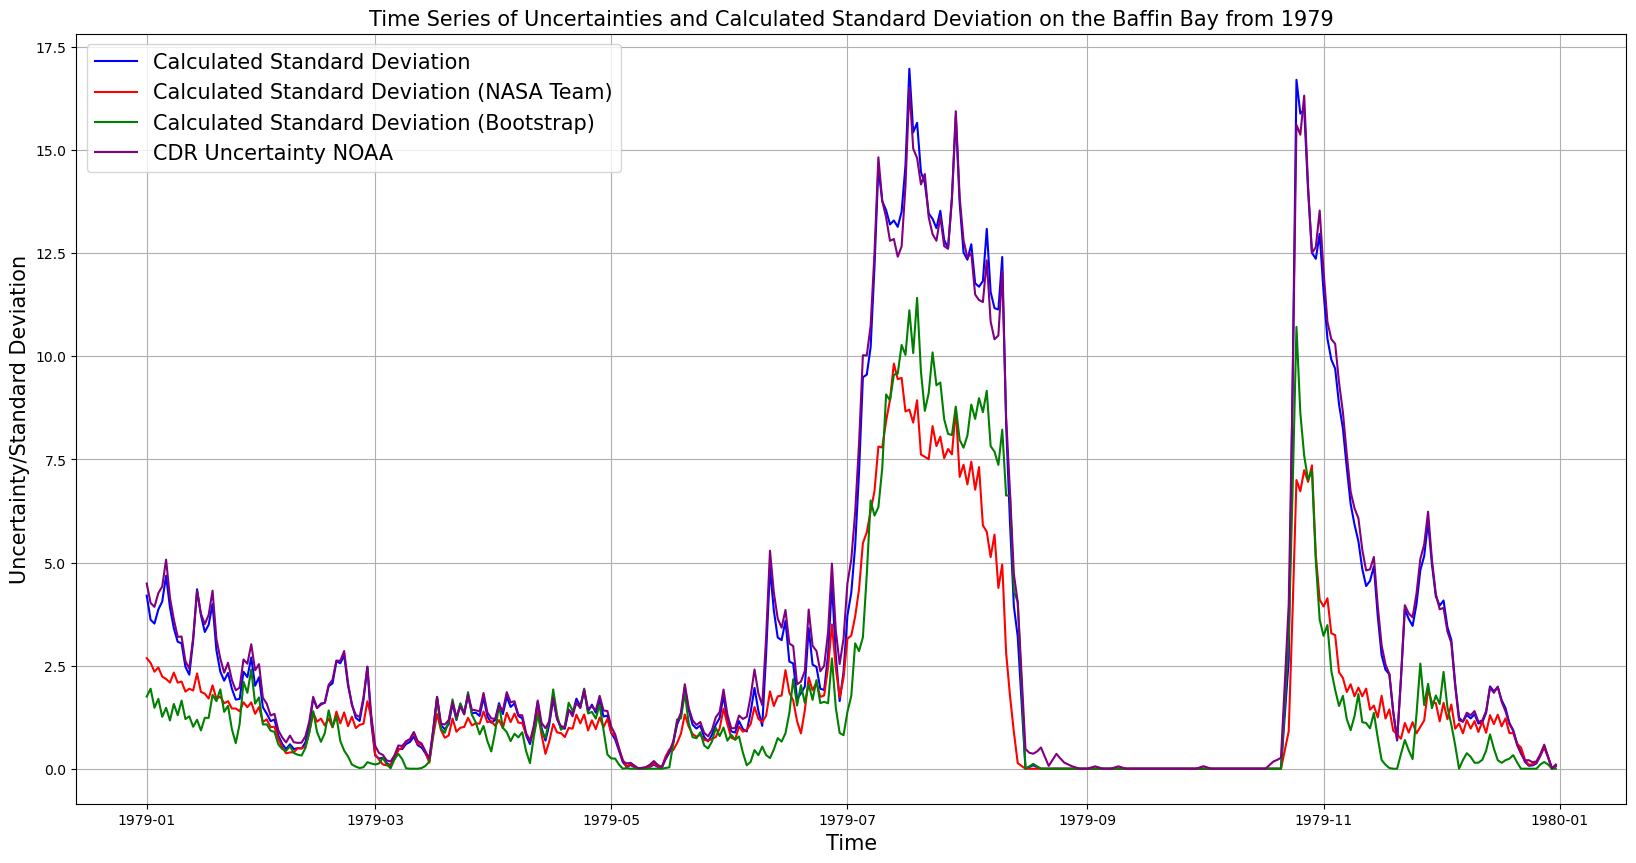

In [17]:
time1979=ds2['time']


plt.figure(figsize=(20, 10))
plt.plot(time1979, stdev_mean_1979*100, label='Calculated Standard Deviation', color='blue')
plt.plot(time1979, stdev_mean_nt_1979*100, label='Calculated Standard Deviation (NASA Team)', color='red')
plt.plot(time1979, stdev_mean_bt_1979*100, label='Calculated Standard Deviation (Bootstrap)', color='green')
plt.plot(time1979, uncertainty_mean_noaa_1979*100, label='CDR Uncertainty NOAA', color='purple')

plt.xlabel('Time',fontsize=15)
plt.ylabel('Uncertainty/Standard Deviation',fontsize=15)
plt.legend(fontsize=15)

# Add a title
plt.title('Time Series of Uncertainties and Calculated Standard Deviation on the Baffin Bay from 1979',fontsize=15)

# Show the plot
plt.grid()
#plt.savefig('all_unc_beaufort_1979.png')
plt.show()

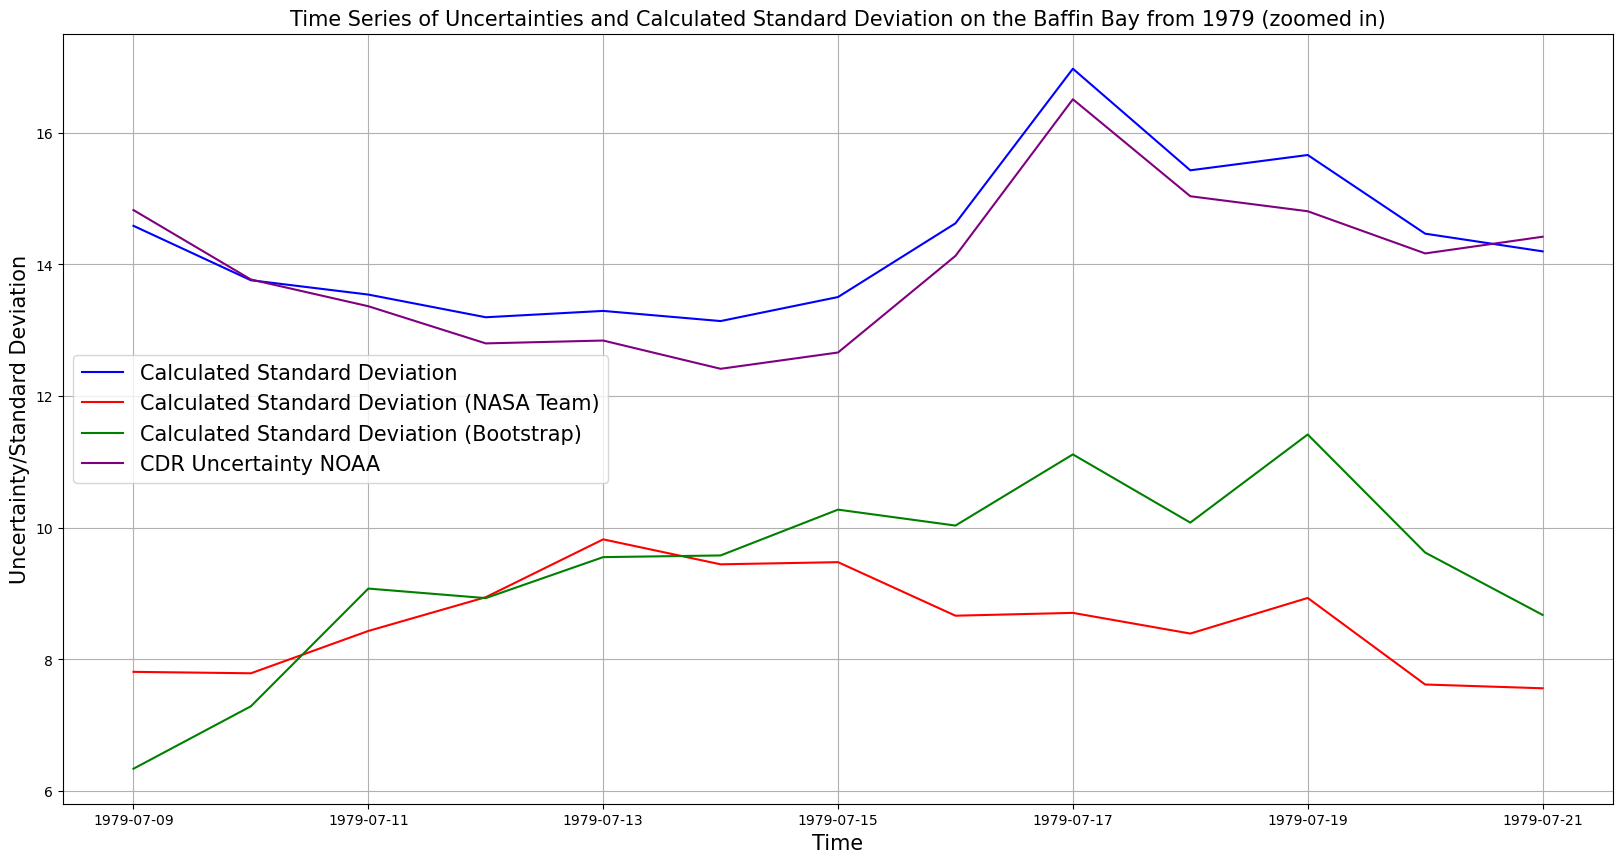

In [20]:
import pandas as pd
start_date = pd.to_datetime('1979-07-09')  # Define your start date
end_date = pd.to_datetime('1979-07-21')    # Define your end date

# Slicing the data for the zoomed-in plot
zoomed_time = time1979[(time1979 >= start_date) & (time1979 <= end_date)]
stdev_mean_1979_zoomed = stdev_mean_1979[(time1979 >= start_date) & (time1979 <= end_date)]
stdev_mean_nt_1979_zoomed = stdev_mean_nt_1979[(time1979 >= start_date) & (time1979 <= end_date)]
stdev_mean_bt_1979_zoomed = stdev_mean_bt_1979[(time1979 >= start_date) & (time1979 <= end_date)]
uncertainty_mean_noaa_1979_zoomed = uncertainty_mean_noaa_1979[(time1979 >= start_date) & (time1979 <= end_date)]

plt.figure(figsize=(20, 10))
plt.plot(zoomed_time, stdev_mean_1979_zoomed*100, label='Calculated Standard Deviation', color='blue')
plt.plot(zoomed_time, stdev_mean_nt_1979_zoomed*100, label='Calculated Standard Deviation (NASA Team)', color='red')
plt.plot(zoomed_time, stdev_mean_bt_1979_zoomed*100, label='Calculated Standard Deviation (Bootstrap)', color='green')
plt.plot(zoomed_time, uncertainty_mean_noaa_1979_zoomed*100, label='CDR Uncertainty NOAA', color='purple')
plt.xlabel('Time',fontsize=15)
plt.ylabel('Uncertainty/Standard Deviation',fontsize=15)
plt.legend(fontsize=15, loc='center left')
plt.title('Time Series of Uncertainties and Calculated Standard Deviation on the Baffin Bay from 1979 (zoomed in)',fontsize=15)
plt.grid()
#plt.savefig('zoom_2020_all_unc_beaufort.png')
plt.show()

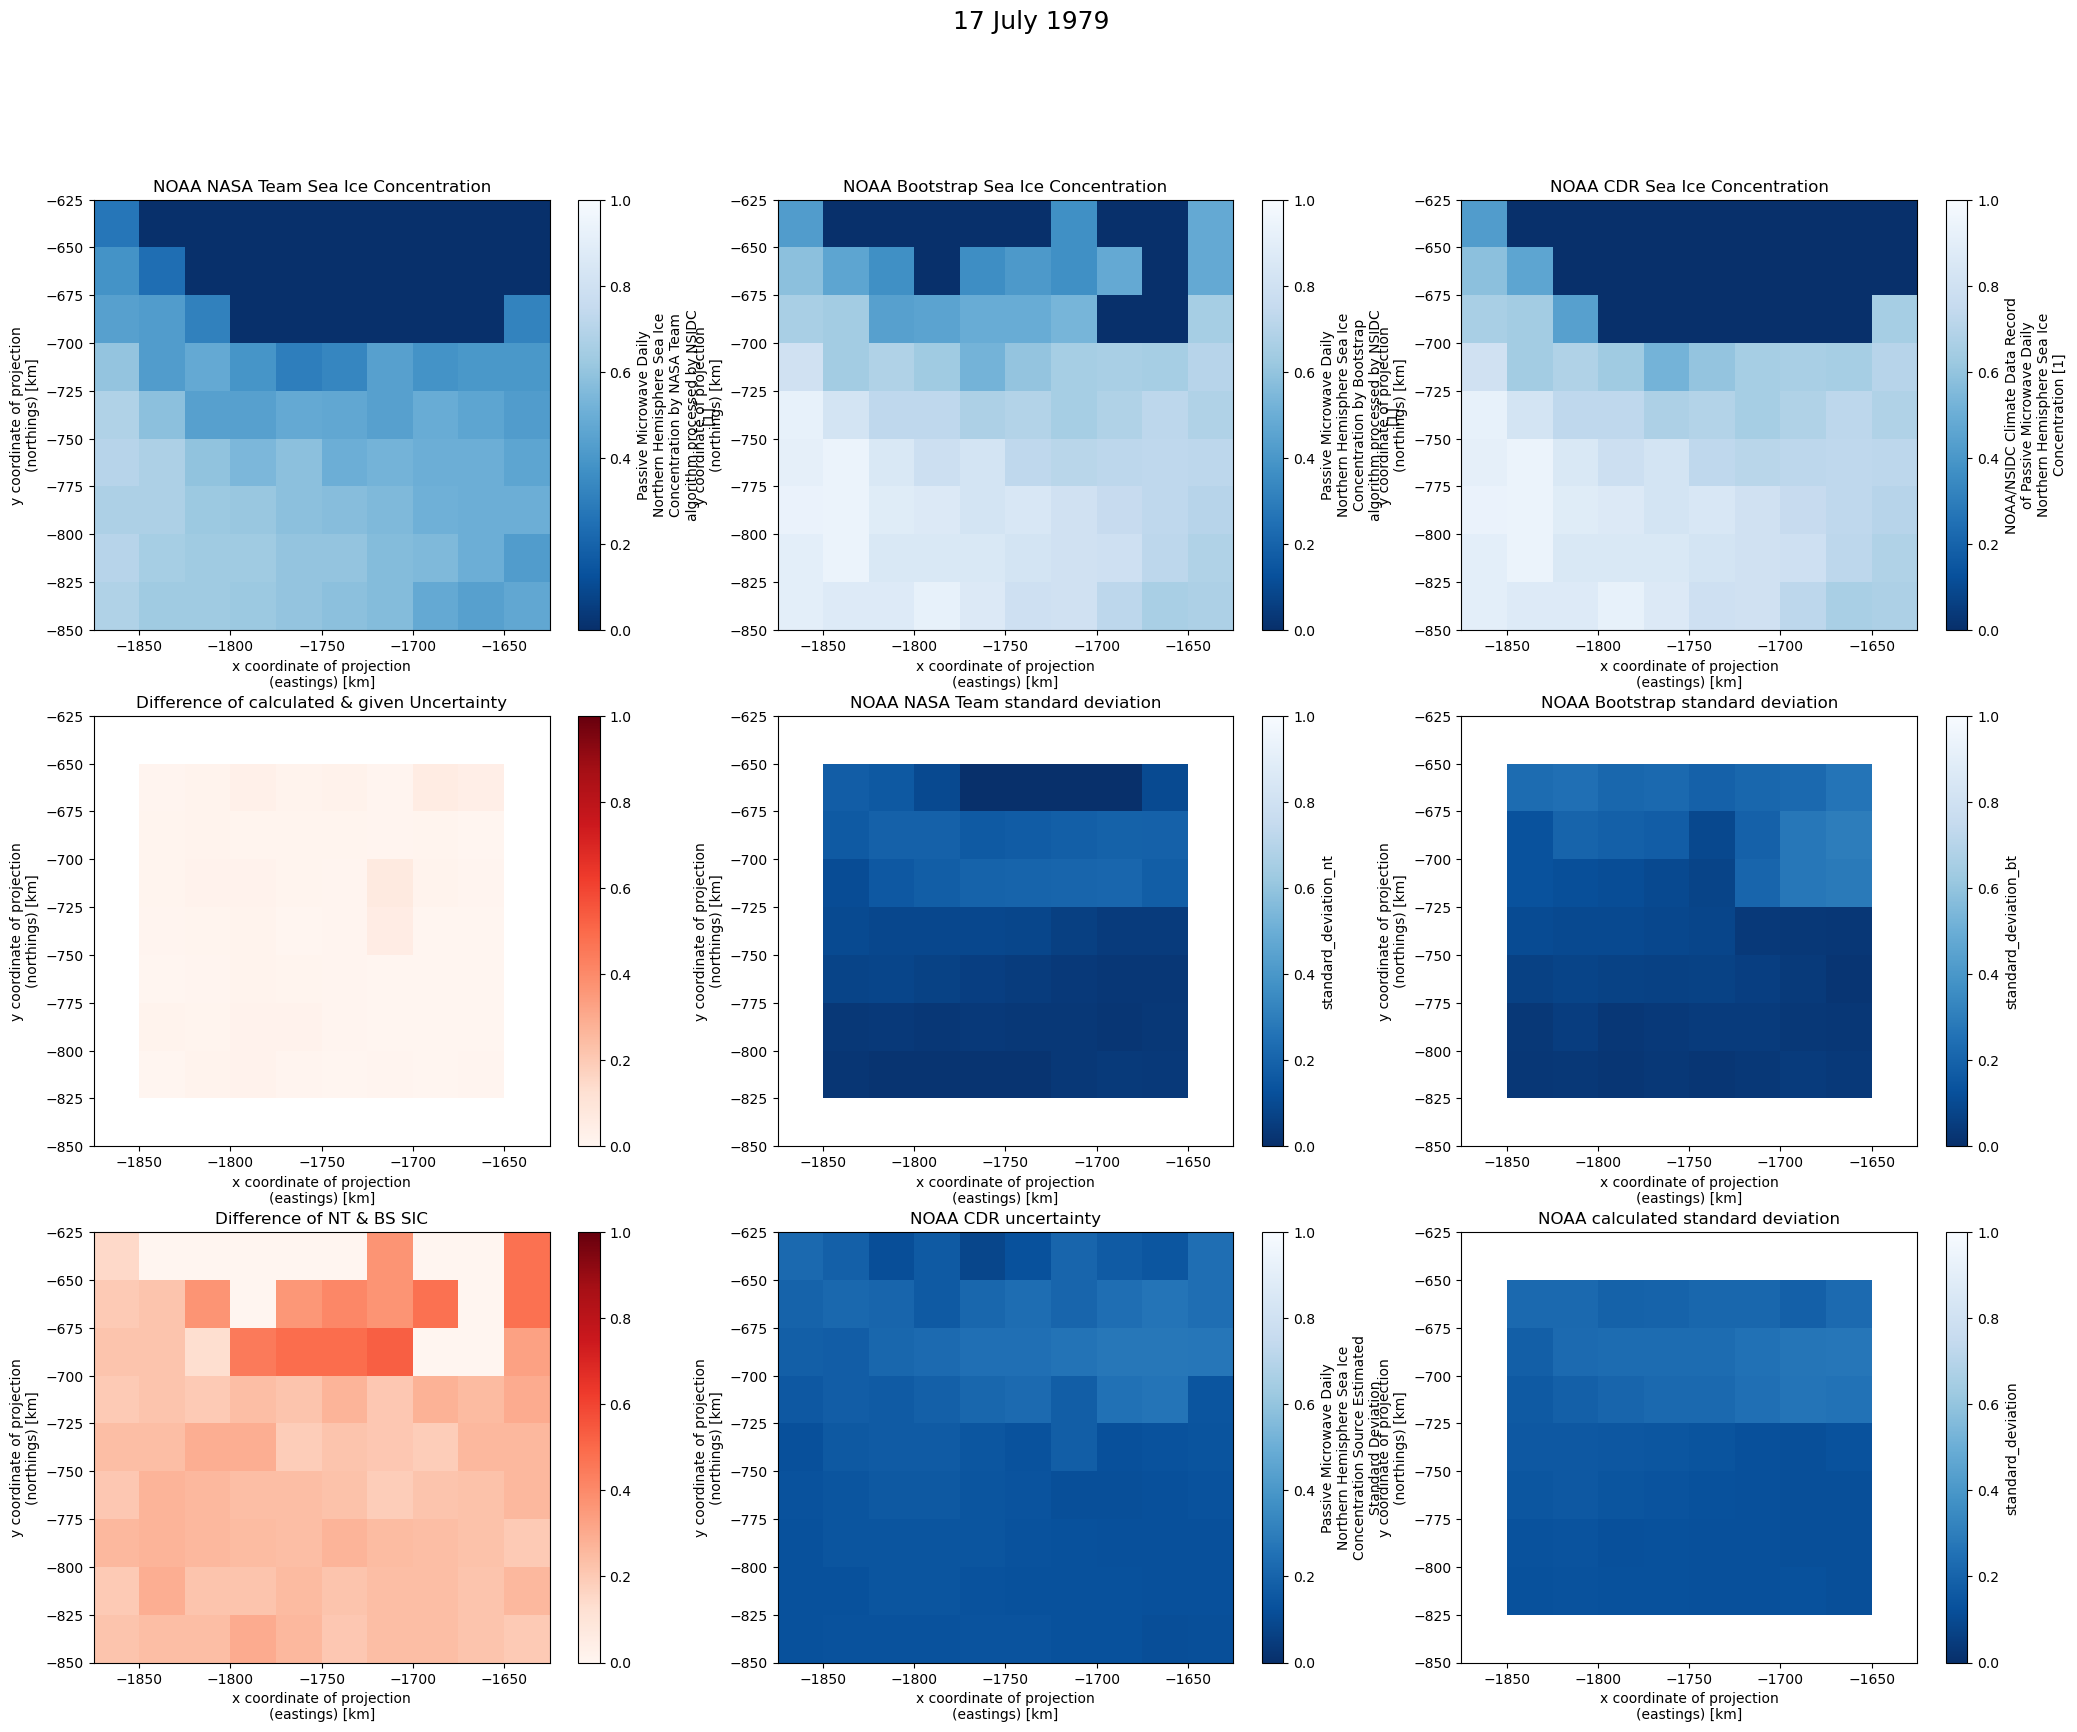

In [91]:
noaa1979_bt_sd=ds2['standard_deviation_bt'].isel(time=197)
noaa1979_nt_sd=ds2['standard_deviation_nt'].isel(time=197)
noaa1979_cdr_sd=ds2['stdev_of_cdr_seaice_conc'].isel(time=197)
noaa1979_clc_sd=ds2['standard_deviation'].isel(time=197)
noaa1979_bt=ds2['nsidc_bt_seaice_conc'].isel(time=197)
noaa1979_nt=ds2['nsidc_nt_seaice_conc'].isel(time=197)
noaa1979_cdr=ds2['cdr_seaice_conc'].isel(time=197)
diff_sd=abs(noaa1979_cdr_sd-noaa1979_clc_sd)
diff_sic=abs(noaa1979_nt-noaa1979_bt)
custom_cmap = 'Blues_r'
vmin=0
vmax=1

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25, 19))

noaa1979_nt.plot(cmap=custom_cmap, vmin=vmin, vmax=vmax, ax=axes[0, 0])
axes[0, 0].set_title('NOAA NASA Team Sea Ice Concentration')

noaa1979_bt.plot(cmap=custom_cmap, vmin=vmin, vmax=vmax, ax=axes[0, 1])
axes[0, 1].set_title('NOAA Bootstrap Sea Ice Concentration')

noaa1979_cdr.plot(cmap=custom_cmap, vmin=vmin, vmax=vmax, ax=axes[0, 2])
axes[0, 2].set_title('NOAA CDR Sea Ice Concentration')

noaa1979_nt_sd.plot(cmap=custom_cmap, vmin=vmin, vmax=vmax, ax=axes[1, 1])
axes[1, 1].set_title('NOAA NASA Team standard deviation')

noaa1979_bt_sd.plot(cmap=custom_cmap, vmin=vmin, vmax=vmax, ax=axes[1, 2])
axes[1, 2].set_title('NOAA Bootstrap standard deviation')

noaa1979_cdr_sd.plot(cmap=custom_cmap, vmin=vmin, vmax=vmax, ax=axes[2, 1])
axes[2, 1].set_title('NOAA CDR uncertainty')

noaa1979_clc_sd.plot(cmap=custom_cmap, vmin=vmin, vmax=vmax, ax=axes[2, 2])
axes[2, 2].set_title('NOAA calculated standard deviation')

diff_sd.plot(cmap='Reds', vmin=vmin, vmax=vmax, ax=axes[1, 0])
axes[1, 0].set_title('Difference of calculated & given Uncertainty')

diff_sic.plot(cmap='Reds', vmin=vmin, vmax=vmax, ax=axes[2, 0])
axes[2, 0].set_title('Difference of NT & BS SIC')

fig.suptitle('17 July 1979',fontsize=18)

#plt.savefig('31_07_1979_SICS.png')
plt.show()

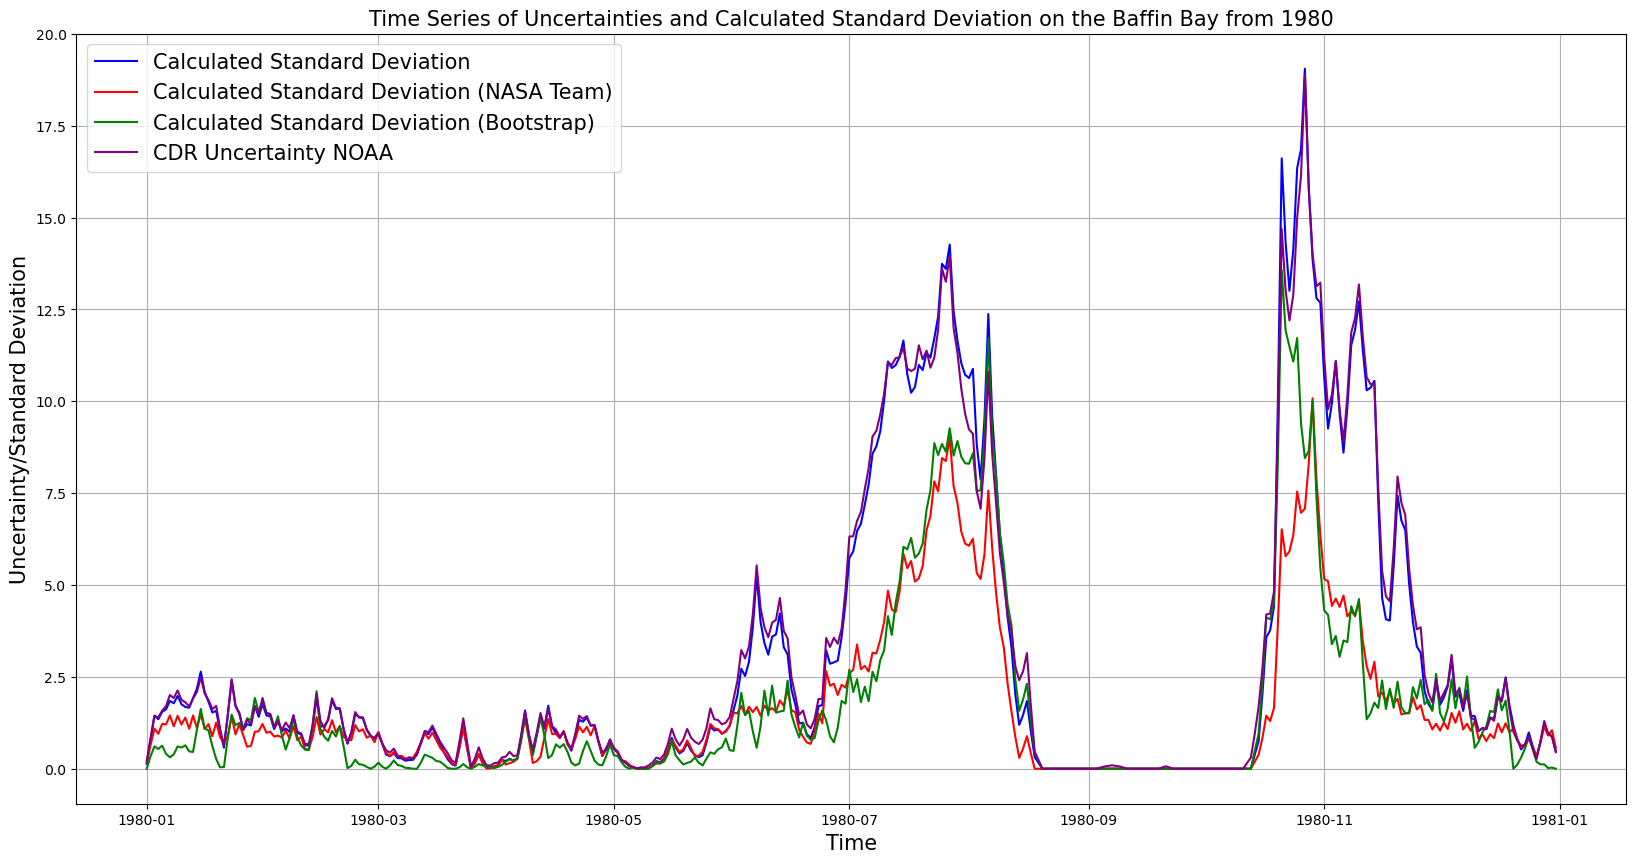

In [40]:
stdev_mean_1980=ds5['standard_deviation'].mean(dim='yc')
stdev_mean_1980=stdev_mean_1980.mean(dim='xc')

stdev_mean_nt_1980=ds5['standard_deviation_nt'].mean(dim='yc')
stdev_mean_nt_1980=stdev_mean_nt_1980.mean(dim='xc')

stdev_mean_bt_1980=ds5['standard_deviation_bt'].mean(dim='yc')
stdev_mean_bt_1980=stdev_mean_bt_1980.mean(dim='xc')

uncertainty_mean_noaa_1980=ds5['stdev_of_cdr_seaice_conc'].mean(dim='yc')
uncertainty_mean_noaa_1980=uncertainty_mean_noaa_1980.mean(dim='xc')


time1980=ds5['time']


plt.figure(figsize=(20, 10))
plt.plot(time1980, stdev_mean_1980*100, label='Calculated Standard Deviation', color='blue')
plt.plot(time1980, stdev_mean_nt_1980*100, label='Calculated Standard Deviation (NASA Team)', color='red')
plt.plot(time1980, stdev_mean_bt_1980*100, label='Calculated Standard Deviation (Bootstrap)', color='green')
plt.plot(time1980, uncertainty_mean_noaa_1980*100, label='CDR Uncertainty NOAA', color='purple')

plt.xlabel('Time',fontsize=15)
plt.ylabel('Uncertainty/Standard Deviation',fontsize=15)
plt.legend(fontsize=15)

# Add a title
plt.title('Time Series of Uncertainties and Calculated Standard Deviation on the Baffin Bay from 1980',fontsize=15)

# Show the plot
plt.grid()
#plt.savefig('all_unc_beaufort_1980.png')
plt.show()

In [ ]:
start_date = pd.to_datetime('1980-06-05')  # Define your start date
end_date = pd.to_datetime('1980-06-21')    # Define your end date

# Slicing the data for the zoomed-in plot
zoomed_time = time1980[(time1980 >= start_date) & (time1980 <= end_date)]
stdev_mean_1980_zoomed = stdev_mean_1980[(time1980 >= start_date) & (time1980 <= end_date)]
stdev_mean_nt_1980_zoomed = stdev_mean_nt_1980[(time1980 >= start_date) & (time1980 <= end_date)]
stdev_mean_bt_1980_zoomed = stdev_mean_bt_1980[(time1980 >= start_date) & (time1980 <= end_date)]
uncertainty_mean_noaa_1980_zoomed = uncertainty_mean_noaa_1980[(time1980 >= start_date) & (time1980 <= end_date)]

plt.figure(figsize=(20, 10))
plt.plot(zoomed_time, stdev_mean_1980_zoomed*100, label='Calculated Standard Deviation', color='blue')
plt.plot(zoomed_time, stdev_mean_nt_1980_zoomed*100, label='Calculated Standard Deviation (NASA Team)', color='red')
plt.plot(zoomed_time, stdev_mean_bt_1980_zoomed*100, label='Calculated Standard Deviation (Bootstrap)', color='green')
plt.plot(zoomed_time, uncertainty_mean_noaa_1980_zoomed*100, label='CDR Uncertainty NOAA', color='purple')
plt.xlabel('Time',fontsize=15)
plt.ylabel('Uncertainty/Standard Deviation',fontsize=15)
plt.legend(fontsize=15, loc='center left')
plt.title('Time Series of Uncertainties and Calculated Standard Deviation on the Baffin Bay from 1980 (zoomed in)',fontsize=15)
plt.grid()
#plt.savefig('zoom_2020_all_unc_beaufort.png')
plt.show()

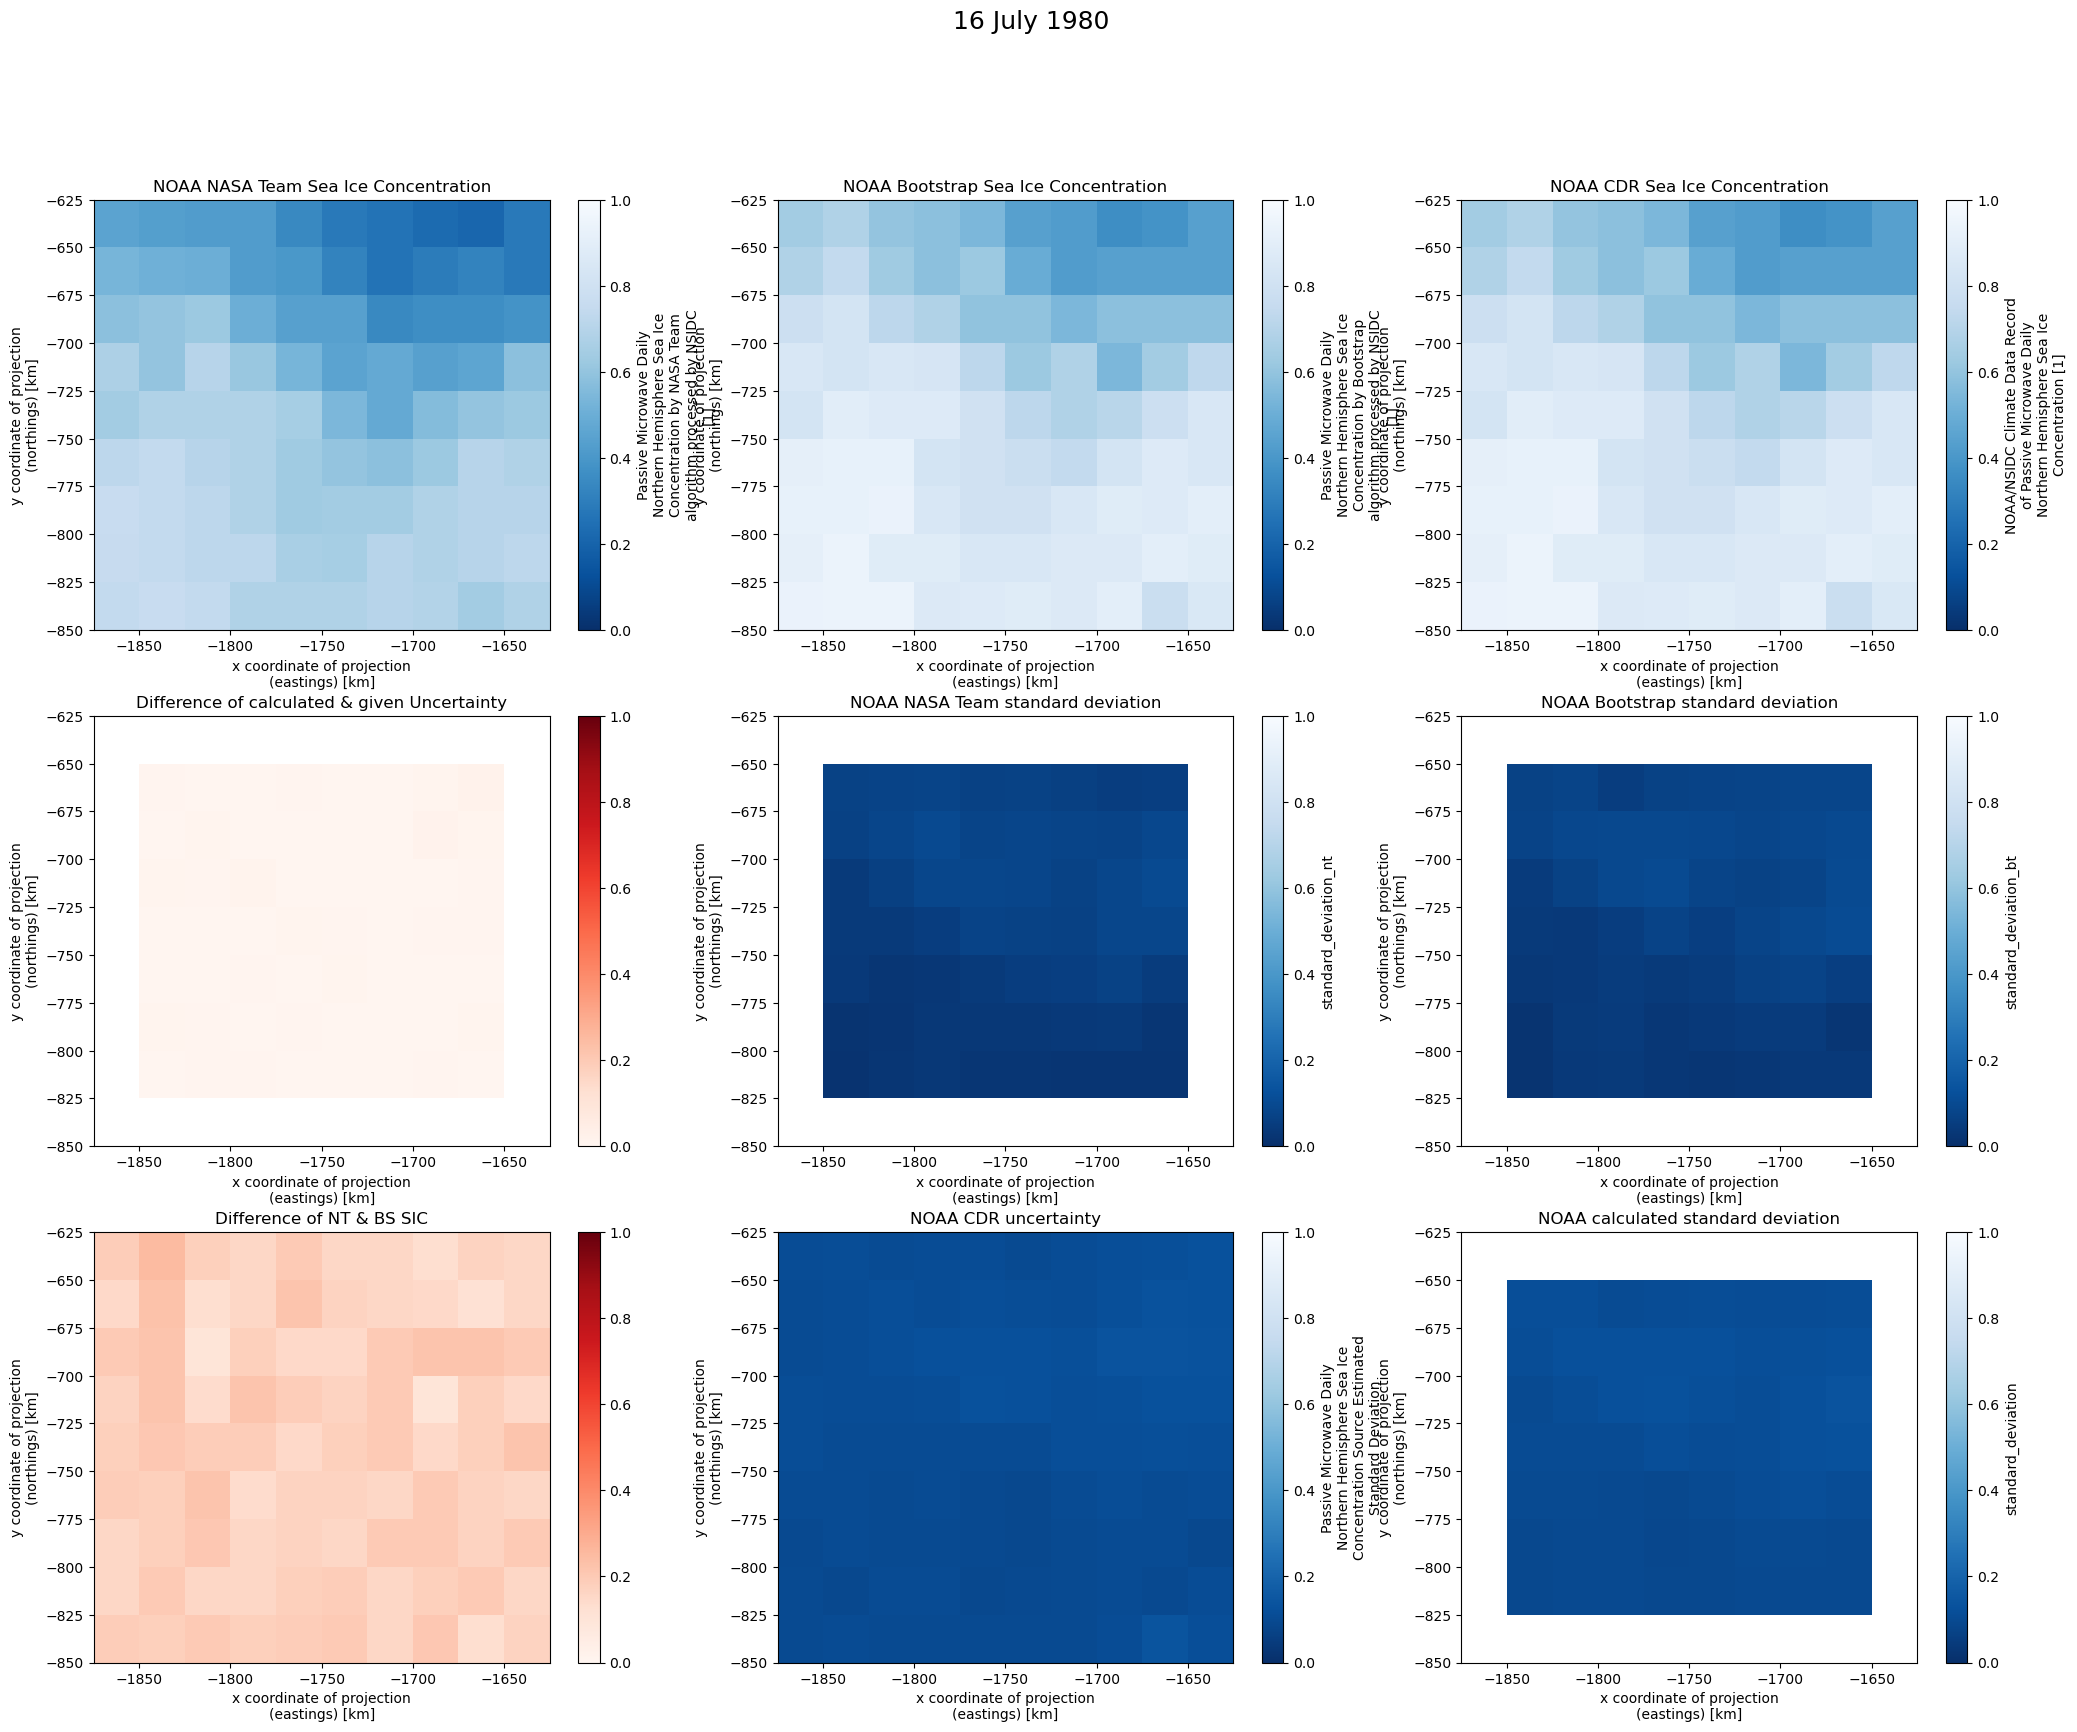

In [67]:
noaa1980_bt=ds5['nsidc_bt_seaice_conc'].isel(time=197)
noaa1980_nt=ds5['nsidc_nt_seaice_conc'].isel(time=197)
noaa1980_cdr=ds5['cdr_seaice_conc'].isel(time=197)
noaa1980_clc_sd=ds5['standard_deviation'].isel(time=197)
diff_sd=abs(noaa1980_cdr_sd-noaa1980_clc_sd)
diff_sic=abs(noaa1980_nt-noaa1980_bt)
custom_cmap = 'Blues_r'
vmin=0
vmax=1

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25, 19))

noaa1980_nt.plot(cmap=custom_cmap, vmin=vmin, vmax=vmax, ax=axes[0, 0])
axes[0, 0].set_title('NOAA NASA Team Sea Ice Concentration')

noaa1980_bt.plot(cmap=custom_cmap, vmin=vmin, vmax=vmax, ax=axes[0, 1])
axes[0, 1].set_title('NOAA Bootstrap Sea Ice Concentration')

noaa1980_cdr.plot(cmap=custom_cmap, vmin=vmin, vmax=vmax, ax=axes[0, 2])
axes[0, 2].set_title('NOAA CDR Sea Ice Concentration')

noaa1980_nt_sd.plot(cmap=custom_cmap, vmin=vmin, vmax=vmax, ax=axes[1, 1])
axes[1, 1].set_title('NOAA NASA Team standard deviation')

noaa1980_bt_sd.plot(cmap=custom_cmap, vmin=vmin, vmax=vmax, ax=axes[1, 2])
axes[1, 2].set_title('NOAA Bootstrap standard deviation')

noaa1980_cdr_sd.plot(cmap=custom_cmap, vmin=vmin, vmax=vmax, ax=axes[2, 1])
axes[2, 1].set_title('NOAA CDR uncertainty')

noaa1980_clc_sd.plot(cmap=custom_cmap, vmin=vmin, vmax=vmax, ax=axes[2, 2])
axes[2, 2].set_title('NOAA calculated standard deviation')

diff_sd.plot(cmap='Reds', vmin=vmin, vmax=vmax, ax=axes[1, 0])
axes[1, 0].set_title('Difference of calculated & given Uncertainty')

diff_sic.plot(cmap='Reds', vmin=vmin, vmax=vmax, ax=axes[2, 0])
axes[2, 0].set_title('Difference of NT & BS SIC')

fig.suptitle('16 July 1980',fontsize=18)

#plt.savefig('31_07_1980_SICS.png')
plt.show()

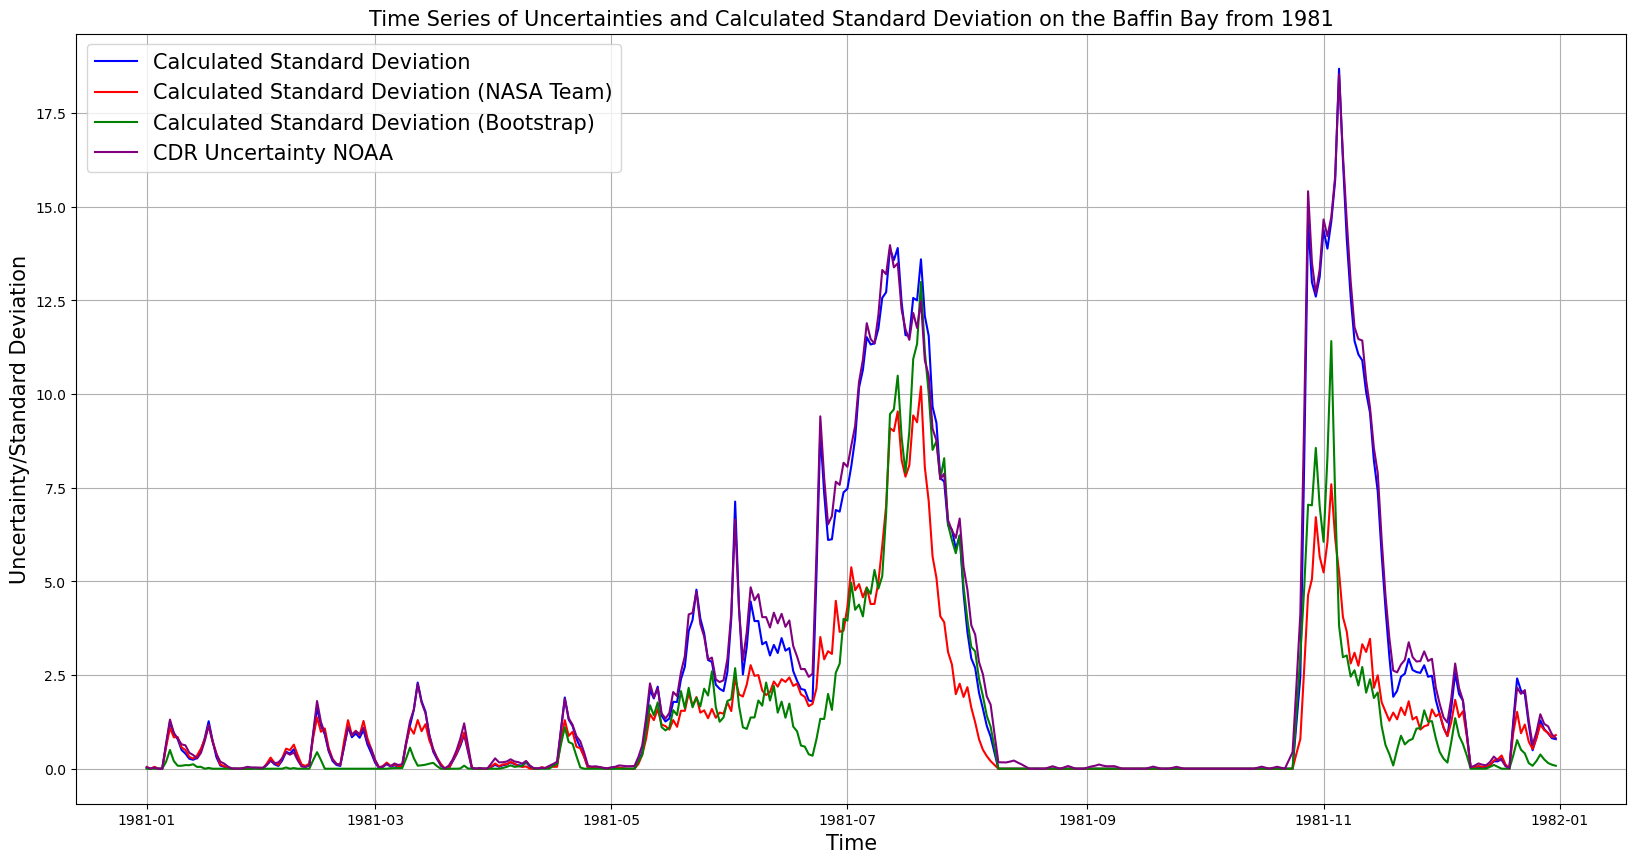

In [102]:
ds6=xr.open_dataset('baffin_bay_noaa_1981_sd__.nc')
stdev_mean_1981=ds6['standard_deviation'].mean(dim='yc')
stdev_mean_1981=stdev_mean_1981.mean(dim='xc')

stdev_mean_nt_1981=ds6['standard_deviation_nt'].mean(dim='yc')
stdev_mean_nt_1981=stdev_mean_nt_1981.mean(dim='xc')

stdev_mean_bt_1981=ds6['standard_deviation_bt'].mean(dim='yc')
stdev_mean_bt_1981=stdev_mean_bt_1981.mean(dim='xc')

uncertainty_mean_noaa_1981=ds6['stdev_of_cdr_seaice_conc'].mean(dim='yc')
uncertainty_mean_noaa_1981=uncertainty_mean_noaa_1981.mean(dim='xc')


time1981=ds6['time']


plt.figure(figsize=(20, 10))
plt.plot(time1981, stdev_mean_1981*100, label='Calculated Standard Deviation', color='blue')
plt.plot(time1981, stdev_mean_nt_1981*100, label='Calculated Standard Deviation (NASA Team)', color='red')
plt.plot(time1981, stdev_mean_bt_1981*100, label='Calculated Standard Deviation (Bootstrap)', color='green')
plt.plot(time1981, uncertainty_mean_noaa_1981*100, label='CDR Uncertainty NOAA', color='purple')

plt.xlabel('Time',fontsize=15)
plt.ylabel('Uncertainty/Standard Deviation',fontsize=15)
plt.legend(fontsize=15)

# Add a title
plt.title('Time Series of Uncertainties and Calculated Standard Deviation on the Baffin Bay from 1981',fontsize=15)

# Show the plot
plt.grid()
#plt.savefig('all_unc_beaufort_1981.png')
plt.show()

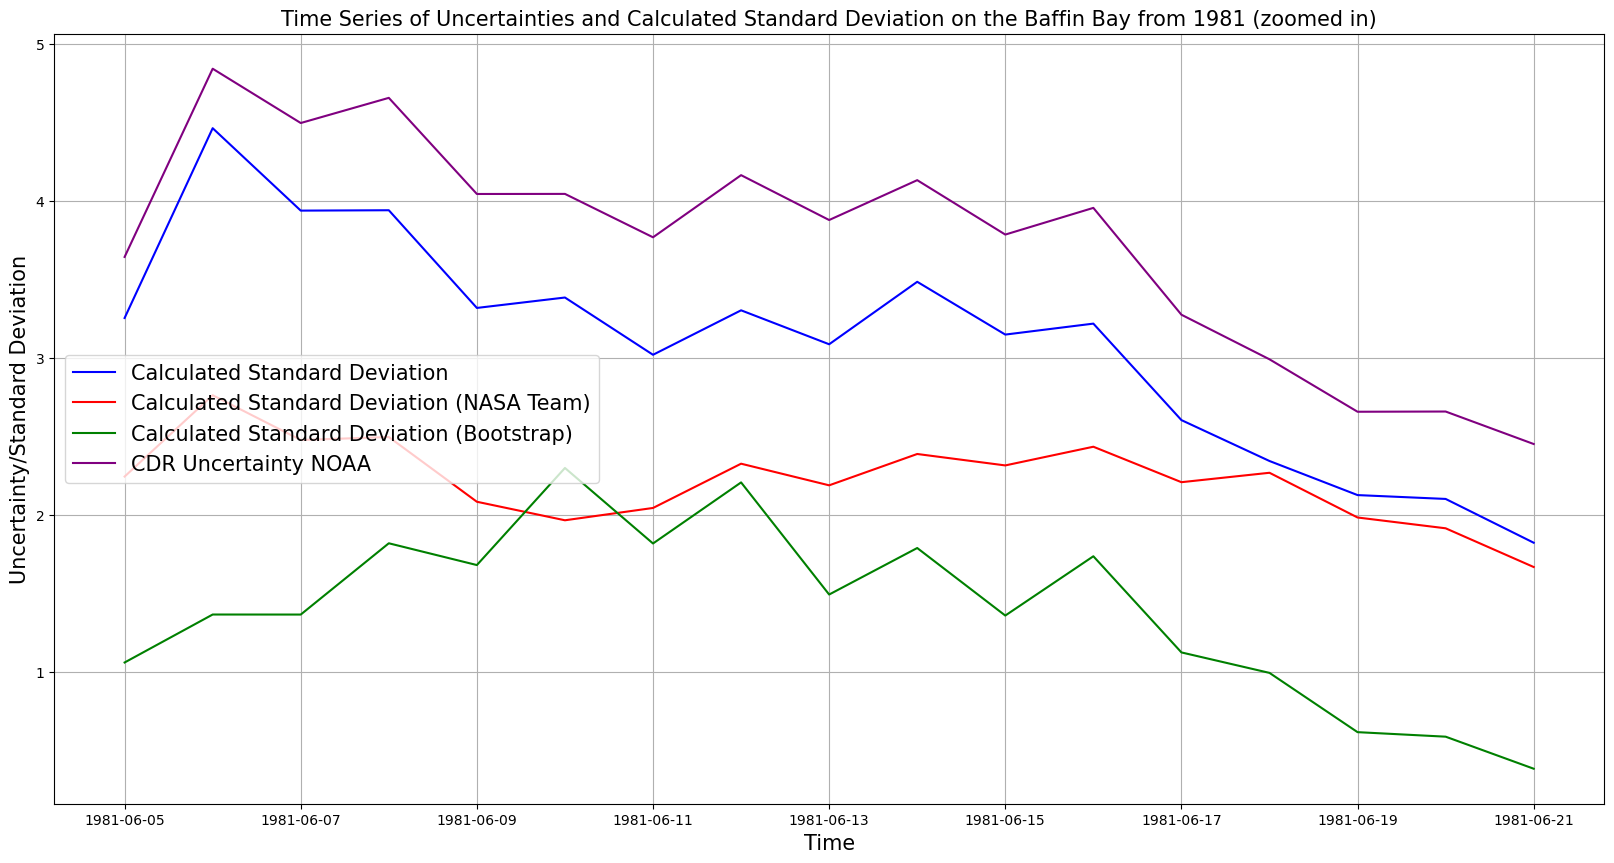

In [59]:
start_date = pd.to_datetime('1981-06-05')  # Define your start date
end_date = pd.to_datetime('1981-06-21')    # Define your end date

# Slicing the data for the zoomed-in plot
zoomed_time = time1981[(time1981 >= start_date) & (time1981 <= end_date)]
stdev_mean_1981_zoomed = stdev_mean_1981[(time1981 >= start_date) & (time1981 <= end_date)]
stdev_mean_nt_1981_zoomed = stdev_mean_nt_1981[(time1981 >= start_date) & (time1981 <= end_date)]
stdev_mean_bt_1981_zoomed = stdev_mean_bt_1981[(time1981 >= start_date) & (time1981 <= end_date)]
uncertainty_mean_noaa_1981_zoomed = uncertainty_mean_noaa_1981[(time1981 >= start_date) & (time1981 <= end_date)]

plt.figure(figsize=(20, 10))
plt.plot(zoomed_time, stdev_mean_1981_zoomed*100, label='Calculated Standard Deviation', color='blue')
plt.plot(zoomed_time, stdev_mean_nt_1981_zoomed*100, label='Calculated Standard Deviation (NASA Team)', color='red')
plt.plot(zoomed_time, stdev_mean_bt_1981_zoomed*100, label='Calculated Standard Deviation (Bootstrap)', color='green')
plt.plot(zoomed_time, uncertainty_mean_noaa_1981_zoomed*100, label='CDR Uncertainty NOAA', color='purple')
plt.xlabel('Time',fontsize=15)
plt.ylabel('Uncertainty/Standard Deviation',fontsize=15)
plt.legend(fontsize=15, loc='center left')
plt.title('Time Series of Uncertainties and Calculated Standard Deviation on the Baffin Bay from 1981 (zoomed in)',fontsize=15)
plt.grid()
#plt.savefig('zoom_2020_all_unc_beaufort.png')
plt.show()

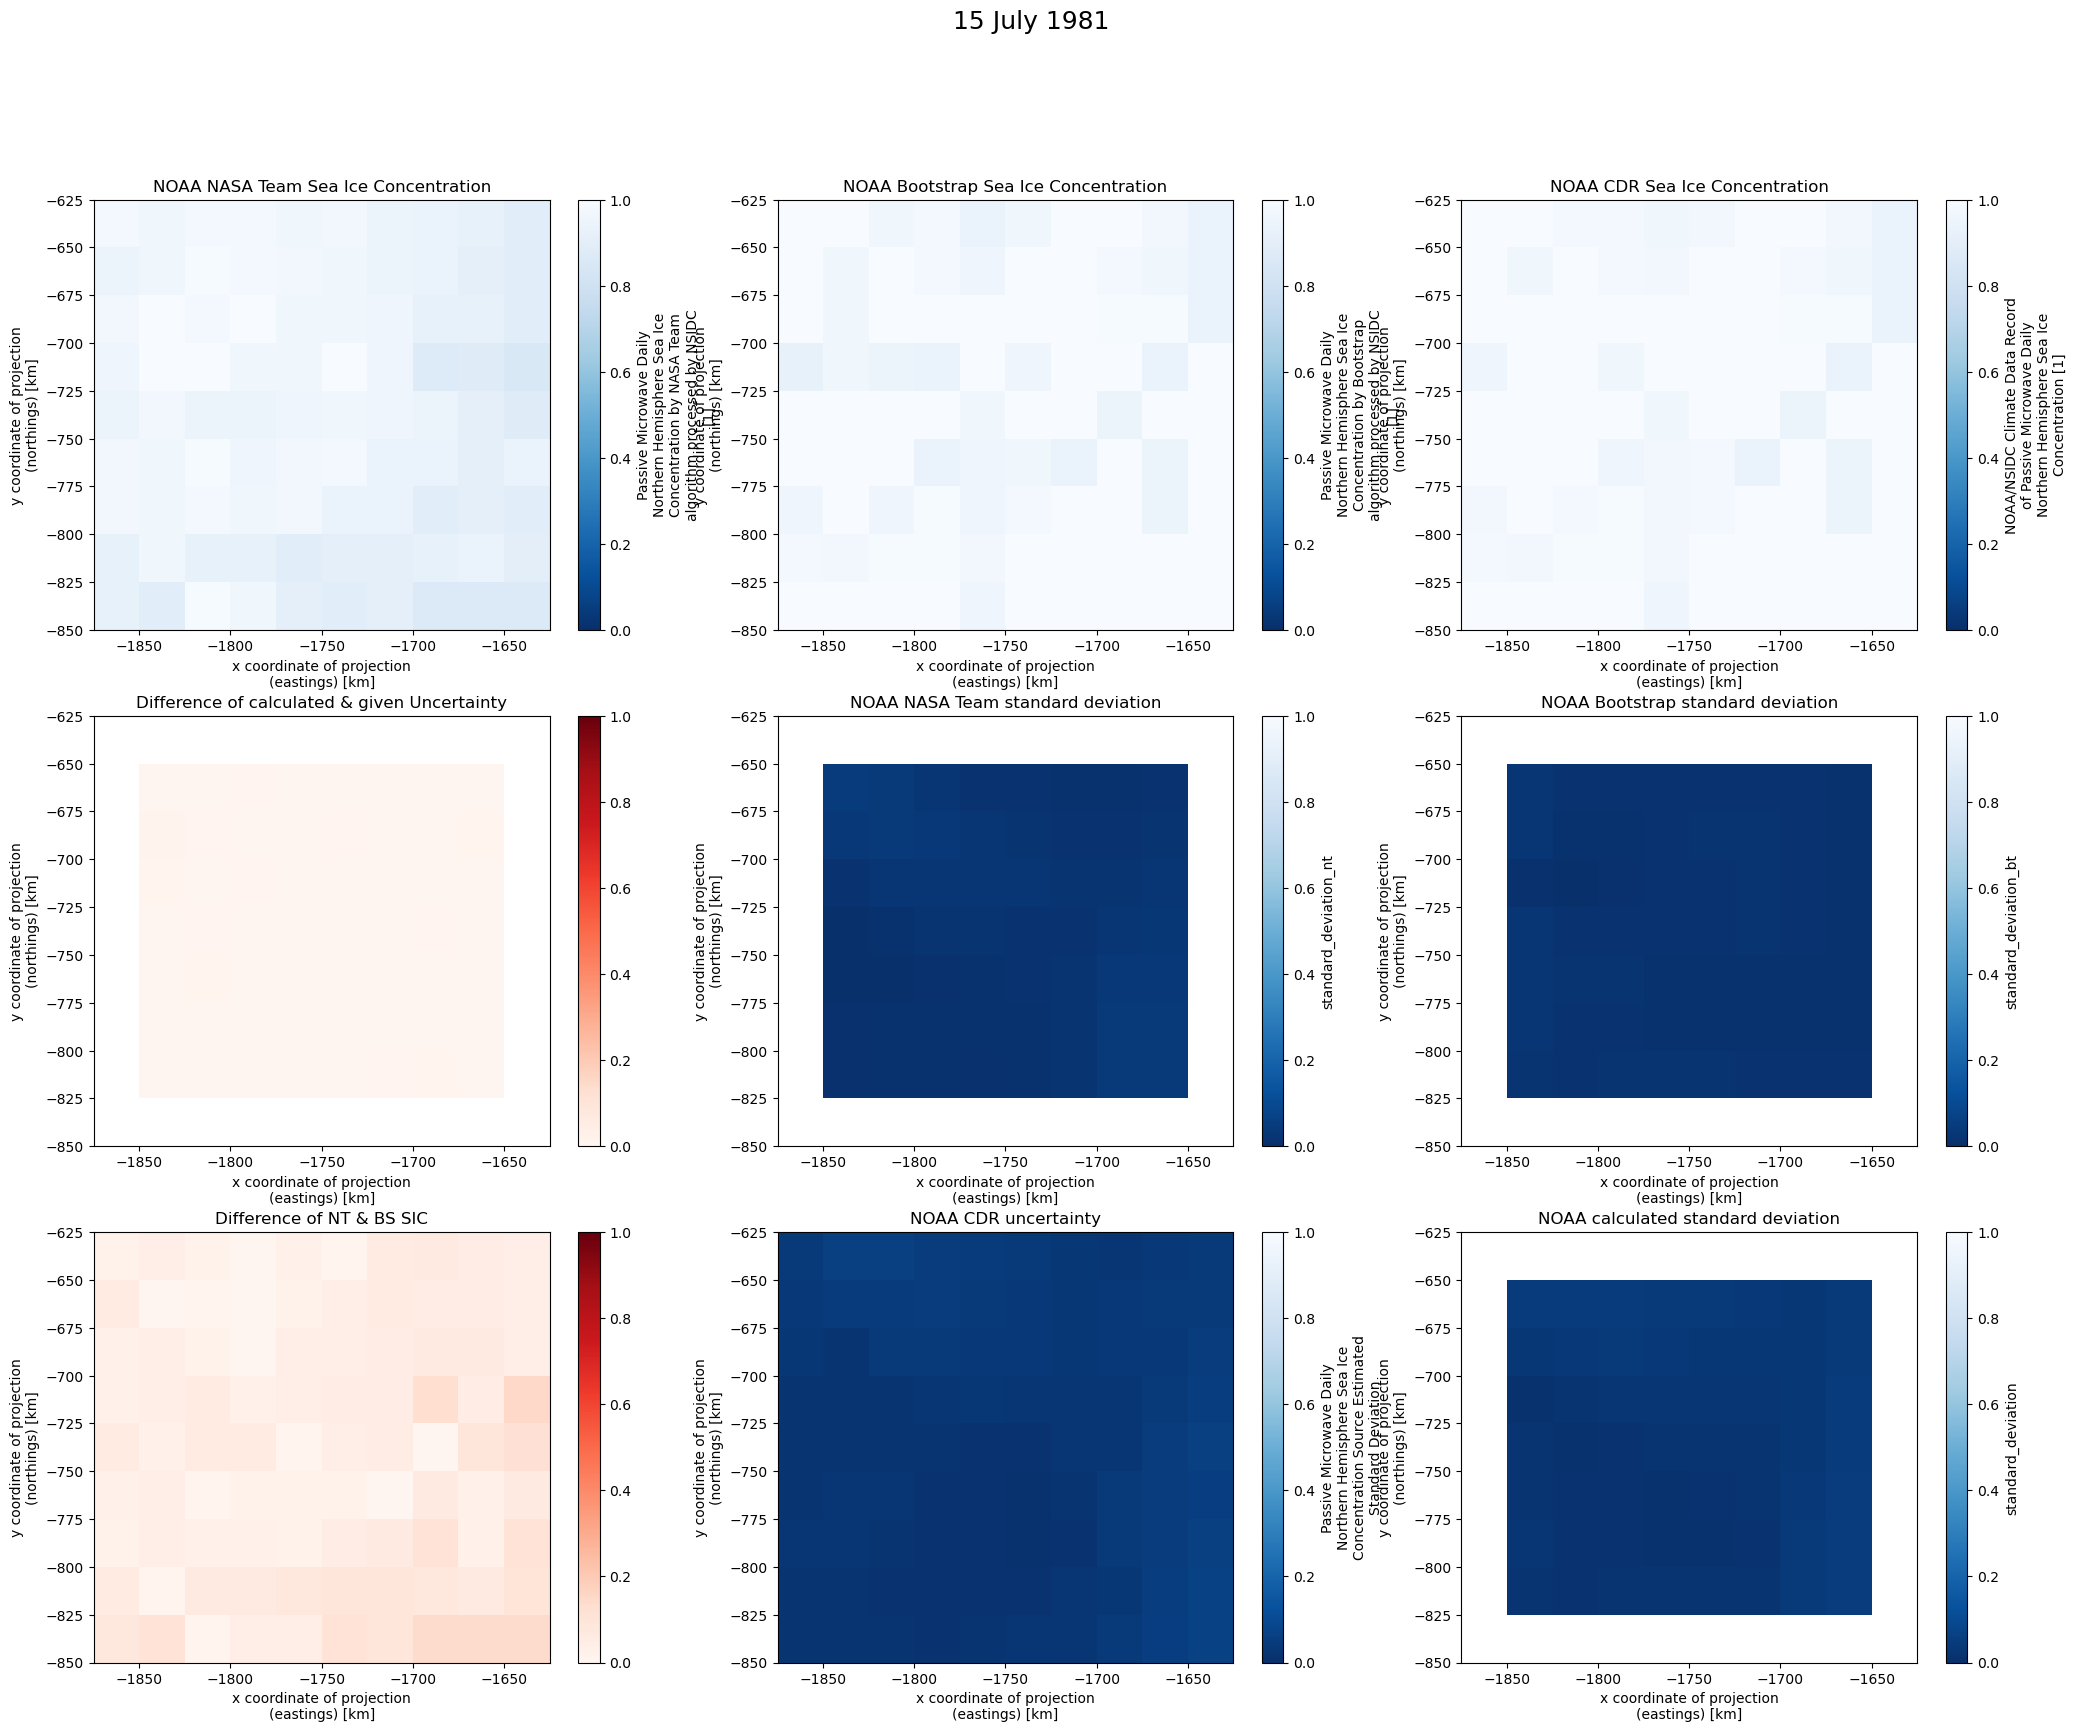

In [76]:
noaa1981_bt=ds5['nsidc_bt_seaice_conc'].isel(time=166)
noaa1981_nt=ds5['nsidc_nt_seaice_conc'].isel(time=166)
noaa1981_cdr=ds5['cdr_seaice_conc'].isel(time=166)
noaa1981_bt_sd=ds2['standard_deviation_bt'].isel(time=166)
noaa1981_nt_sd=ds2['standard_deviation_nt'].isel(time=166)
noaa1981_cdr_sd=ds2['stdev_of_cdr_seaice_conc'].isel(time=166)
noaa1981_clc_sd=ds2['standard_deviation'].isel(time=166)
diff_sd=abs(noaa1981_cdr_sd-noaa1981_clc_sd)
diff_sic=abs(noaa1981_nt-noaa1981_bt)
custom_cmap = 'Blues_r'
vmin=0
vmax=1

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25, 19))

noaa1981_nt.plot(cmap=custom_cmap, vmin=vmin, vmax=vmax, ax=axes[0, 0])
axes[0, 0].set_title('NOAA NASA Team Sea Ice Concentration')

noaa1981_bt.plot(cmap=custom_cmap, vmin=vmin, vmax=vmax, ax=axes[0, 1])
axes[0, 1].set_title('NOAA Bootstrap Sea Ice Concentration')

noaa1981_cdr.plot(cmap=custom_cmap, vmin=vmin, vmax=vmax, ax=axes[0, 2])
axes[0, 2].set_title('NOAA CDR Sea Ice Concentration')

noaa1981_nt_sd.plot(cmap=custom_cmap, vmin=vmin, vmax=vmax, ax=axes[1, 1])
axes[1, 1].set_title('NOAA NASA Team standard deviation')

noaa1981_bt_sd.plot(cmap=custom_cmap, vmin=vmin, vmax=vmax, ax=axes[1, 2])
axes[1, 2].set_title('NOAA Bootstrap standard deviation')

noaa1981_cdr_sd.plot(cmap=custom_cmap, vmin=vmin, vmax=vmax, ax=axes[2, 1])
axes[2, 1].set_title('NOAA CDR uncertainty')

noaa1981_clc_sd.plot(cmap=custom_cmap, vmin=vmin, vmax=vmax, ax=axes[2, 2])
axes[2, 2].set_title('NOAA calculated standard deviation')

diff_sd.plot(cmap='Reds', vmin=vmin, vmax=vmax, ax=axes[1, 0])
axes[1, 0].set_title('Difference of calculated & given Uncertainty')

diff_sic.plot(cmap='Reds', vmin=vmin, vmax=vmax, ax=axes[2, 0])
axes[2, 0].set_title('Difference of NT & BS SIC')

fig.suptitle('15 July 1981',fontsize=18)

#plt.savefig('31_07_1981_SICS.png')
plt.show()

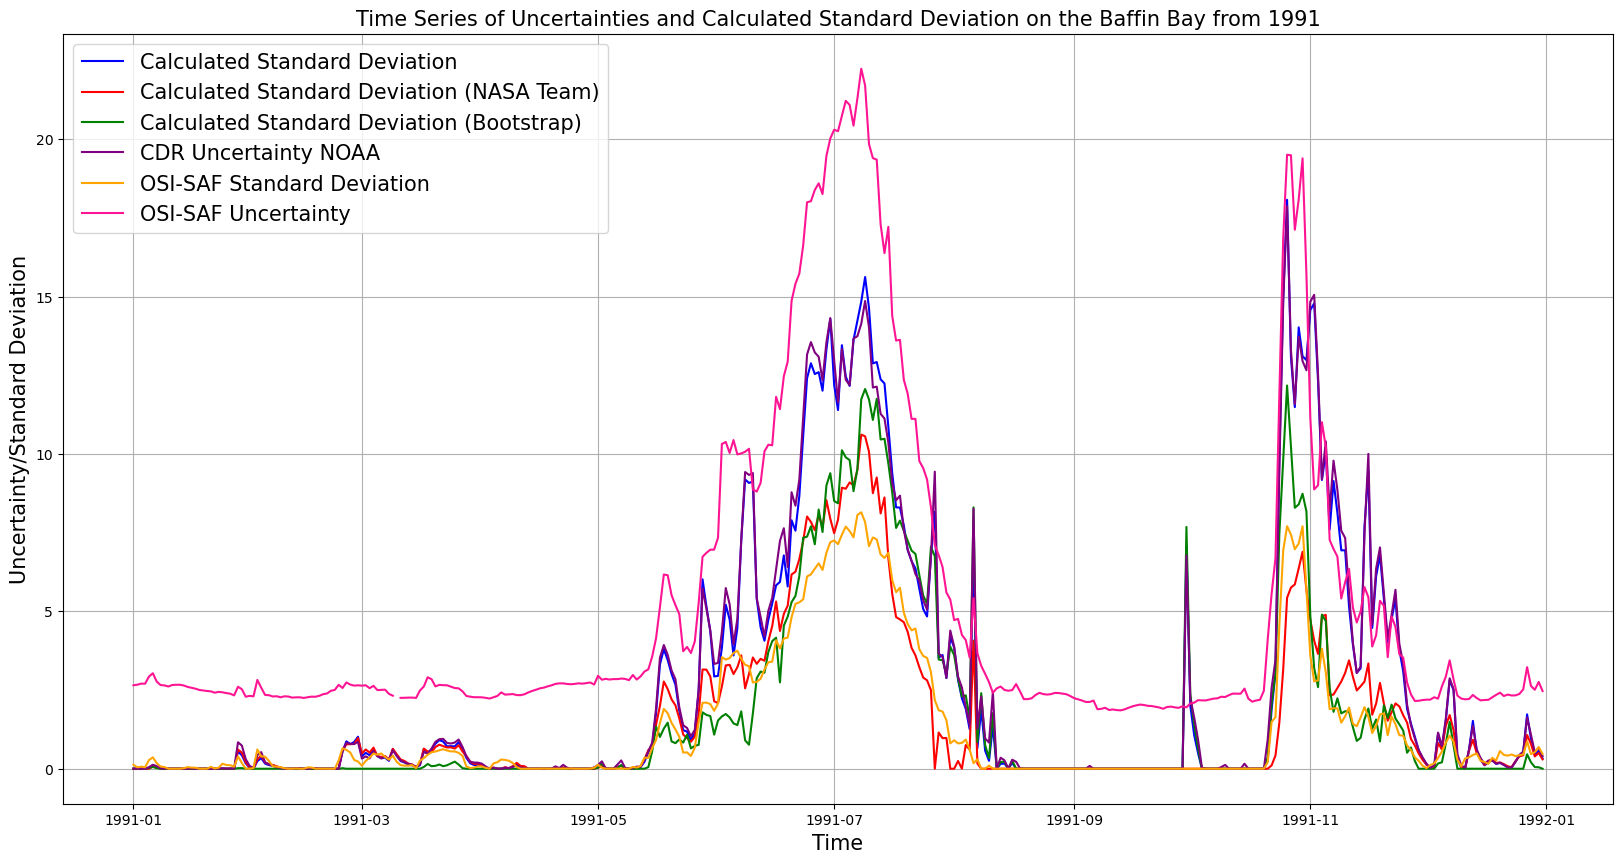

In [96]:
noaa1991=xr.open_dataset('baffin_bay_noaa_1991_sd__.nc')
osi1991=xr.open_dataset('baffin_bay_osi_1991_sd__.nc')

stdev_mean_1991=noaa1991['standard_deviation'].mean(dim='yc')
stdev_mean_1991=stdev_mean_1991.mean(dim='xc')

stdev_mean_nt_1991=noaa1991['standard_deviation_nt'].mean(dim='yc')
stdev_mean_nt_1991=stdev_mean_nt_1991.mean(dim='xc')

stdev_mean_bt_1991=noaa1991['standard_deviation_bt'].mean(dim='yc')
stdev_mean_bt_1991=stdev_mean_bt_1991.mean(dim='xc')

uncertainty_mean_noaa_1991=noaa1991['stdev_of_cdr_seaice_conc'].mean(dim='yc')
uncertainty_mean_noaa_1991=uncertainty_mean_noaa_1991.mean(dim='xc')

stdev_mean_osi_1991=osi1991['standard_deviation_osi'].mean(dim='yc')
stdev_mean_osi_1991=stdev_mean_osi_1991.mean(dim='xc')

uncertainty_mean_osi_1991=osi1991['total_standard_error'].mean(dim='yc')
uncertainty_mean_osi_1991=uncertainty_mean_osi_1991.mean(dim='xc')

time1991=noaa1991['time']

plt.figure(figsize=(20, 10))
plt.plot(time1991, stdev_mean_1991*100, label='Calculated Standard Deviation', color='blue')
plt.plot(time1991, stdev_mean_nt_1991*100, label='Calculated Standard Deviation (NASA Team)', color='red')
plt.plot(time1991, stdev_mean_bt_1991*100, label='Calculated Standard Deviation (Bootstrap)', color='green')
plt.plot(time1991, uncertainty_mean_noaa_1991*100, label='CDR Uncertainty NOAA', color='purple')
plt.plot(time1991[-len(stdev_mean_osi_1991):], stdev_mean_osi_1991, label='OSI-SAF Standard Deviation', color='orange')
plt.plot(time1991[-len(stdev_mean_osi_1991):], uncertainty_mean_osi_1991, label='OSI-SAF Uncertainty', color='deeppink')

plt.xlabel('Time',fontsize=15)
plt.ylabel('Uncertainty/Standard Deviation',fontsize=15)
plt.legend(fontsize=15)

# Add a title
plt.title('Time Series of Uncertainties and Calculated Standard Deviation on the Baffin Bay from 1991',fontsize=15)

# Show the plot
plt.grid()
#plt.savefig('all_unc_beaufort_1991.png')
plt.show()

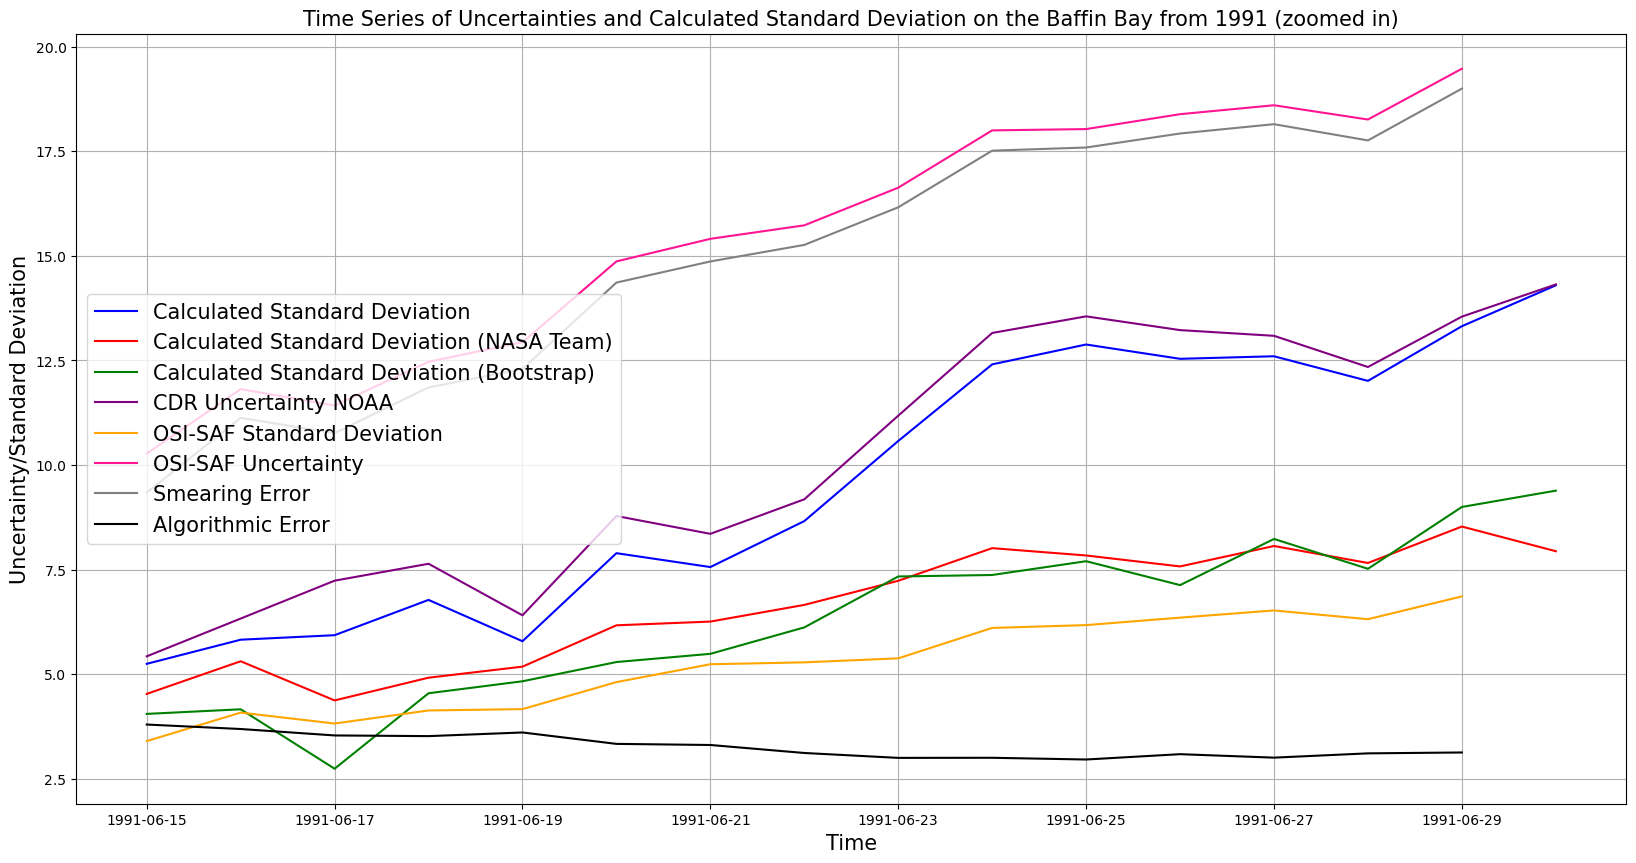

In [97]:
start_date = pd.to_datetime('1991-06-15')
end_date = pd.to_datetime('1991-06-30')

smearing_mean_1991=osi1991['smearing_standard_error'].mean(dim='yc')
smearing_mean_1991=smearing_mean_1991.mean(dim='xc')
algo_mean_1991=osi1991['algorithm_standard_error'].mean(dim='yc')
algo_mean_1991=algo_mean_1991.mean(dim='xc')
smearing_mean_1991_zoomed = smearing_mean_1991.sel(time=slice(start_date, end_date))
algo_mean_1991_zoomed = algo_mean_1991.sel(time=slice(start_date, end_date))

zoomed_time = time1991[(time1991 >= start_date) & (time1991 <= end_date)]
stdev_mean_1991_zoomed = stdev_mean_1991[(time1991 >= start_date) & (time1991 <= end_date)]
stdev_mean_nt_1991_zoomed = stdev_mean_nt_1991[(time1991 >= start_date) & (time1991 <= end_date)]
stdev_mean_bt_1991_zoomed = stdev_mean_bt_1991[(time1991 >= start_date) & (time1991 <= end_date)]
uncertainty_mean_noaa_1991_zoomed = uncertainty_mean_noaa_1991[(time1991 >= start_date) & (time1991 <= end_date)]
stdev_mean_osi_1991_zoomed = stdev_mean_osi_1991.sel(time=slice(start_date, end_date))
uncertainty_mean_osi_1991_zoomed = uncertainty_mean_osi_1991.sel(time=slice(start_date, end_date))

plt.figure(figsize=(20, 10))
plt.plot(zoomed_time, stdev_mean_1991_zoomed*100, label='Calculated Standard Deviation', color='blue')
plt.plot(zoomed_time, stdev_mean_nt_1991_zoomed*100, label='Calculated Standard Deviation (NASA Team)', color='red')
plt.plot(zoomed_time, stdev_mean_bt_1991_zoomed*100, label='Calculated Standard Deviation (Bootstrap)', color='green')
plt.plot(zoomed_time, uncertainty_mean_noaa_1991_zoomed*100, label='CDR Uncertainty NOAA', color='purple')
plt.plot(zoomed_time[:len(stdev_mean_osi_1991_zoomed)], stdev_mean_osi_1991_zoomed, label='OSI-SAF Standard Deviation', color='orange')
plt.plot(zoomed_time[:len(uncertainty_mean_osi_1991_zoomed):], uncertainty_mean_osi_1991_zoomed, label='OSI-SAF Uncertainty', color='deeppink')
plt.plot(zoomed_time[:len(smearing_mean_1991_zoomed):], smearing_mean_1991_zoomed, label='Smearing Error', color='grey')
plt.plot(zoomed_time[:len(algo_mean_1991_zoomed):], algo_mean_1991_zoomed, label='Algorithmic Error', color='black')

plt.xlabel('Time',fontsize=15)
plt.ylabel('Uncertainty/Standard Deviation',fontsize=15)
plt.legend(fontsize=15, loc='center left')
plt.title('Time Series of Uncertainties and Calculated Standard Deviation on the Baffin Bay from 1991 (zoomed in)',fontsize=15)
plt.grid()
#plt.savefig('zoom_1991_all_unc_beaufort.png')
plt.show()

In [98]:
noaa1991_bt=ds5['nsidc_bt_seaice_conc'].isel(time=166)
noaa1991_bt

<xarray.DataArray 'nsidc_bt_seaice_conc' (yc: 9, xc: 10)>
[90 values with dtype=float32]
Coordinates:
    time     datetime64[ns] 1980-06-15
    lon      (yc, xc) float32 ...
    lat      (yc, xc) float32 ...
  * xc       (xc) float64 -1.862e+03 -1.838e+03 ... -1.662e+03 -1.638e+03
  * yc       (yc) float64 -637.5 -662.5 -687.5 -712.5 ... -787.5 -812.5 -837.5
Attributes:
    standard_name:  sea_ice_area_fraction
    long_name:      Passive Microwave Daily Northern Hemisphere Sea Ice Conce...
    units:          1
    grid_mapping:   Lambert_Azimuthal_Grid
    flag_values:    [251 252 253 254 255]
    flag_meanings:  pole_hole unused coastal land_mask missing_data
    datum:          +ellps=urn:ogc:def:crs:EPSG::4326
    cell_methods:   tdim: mean

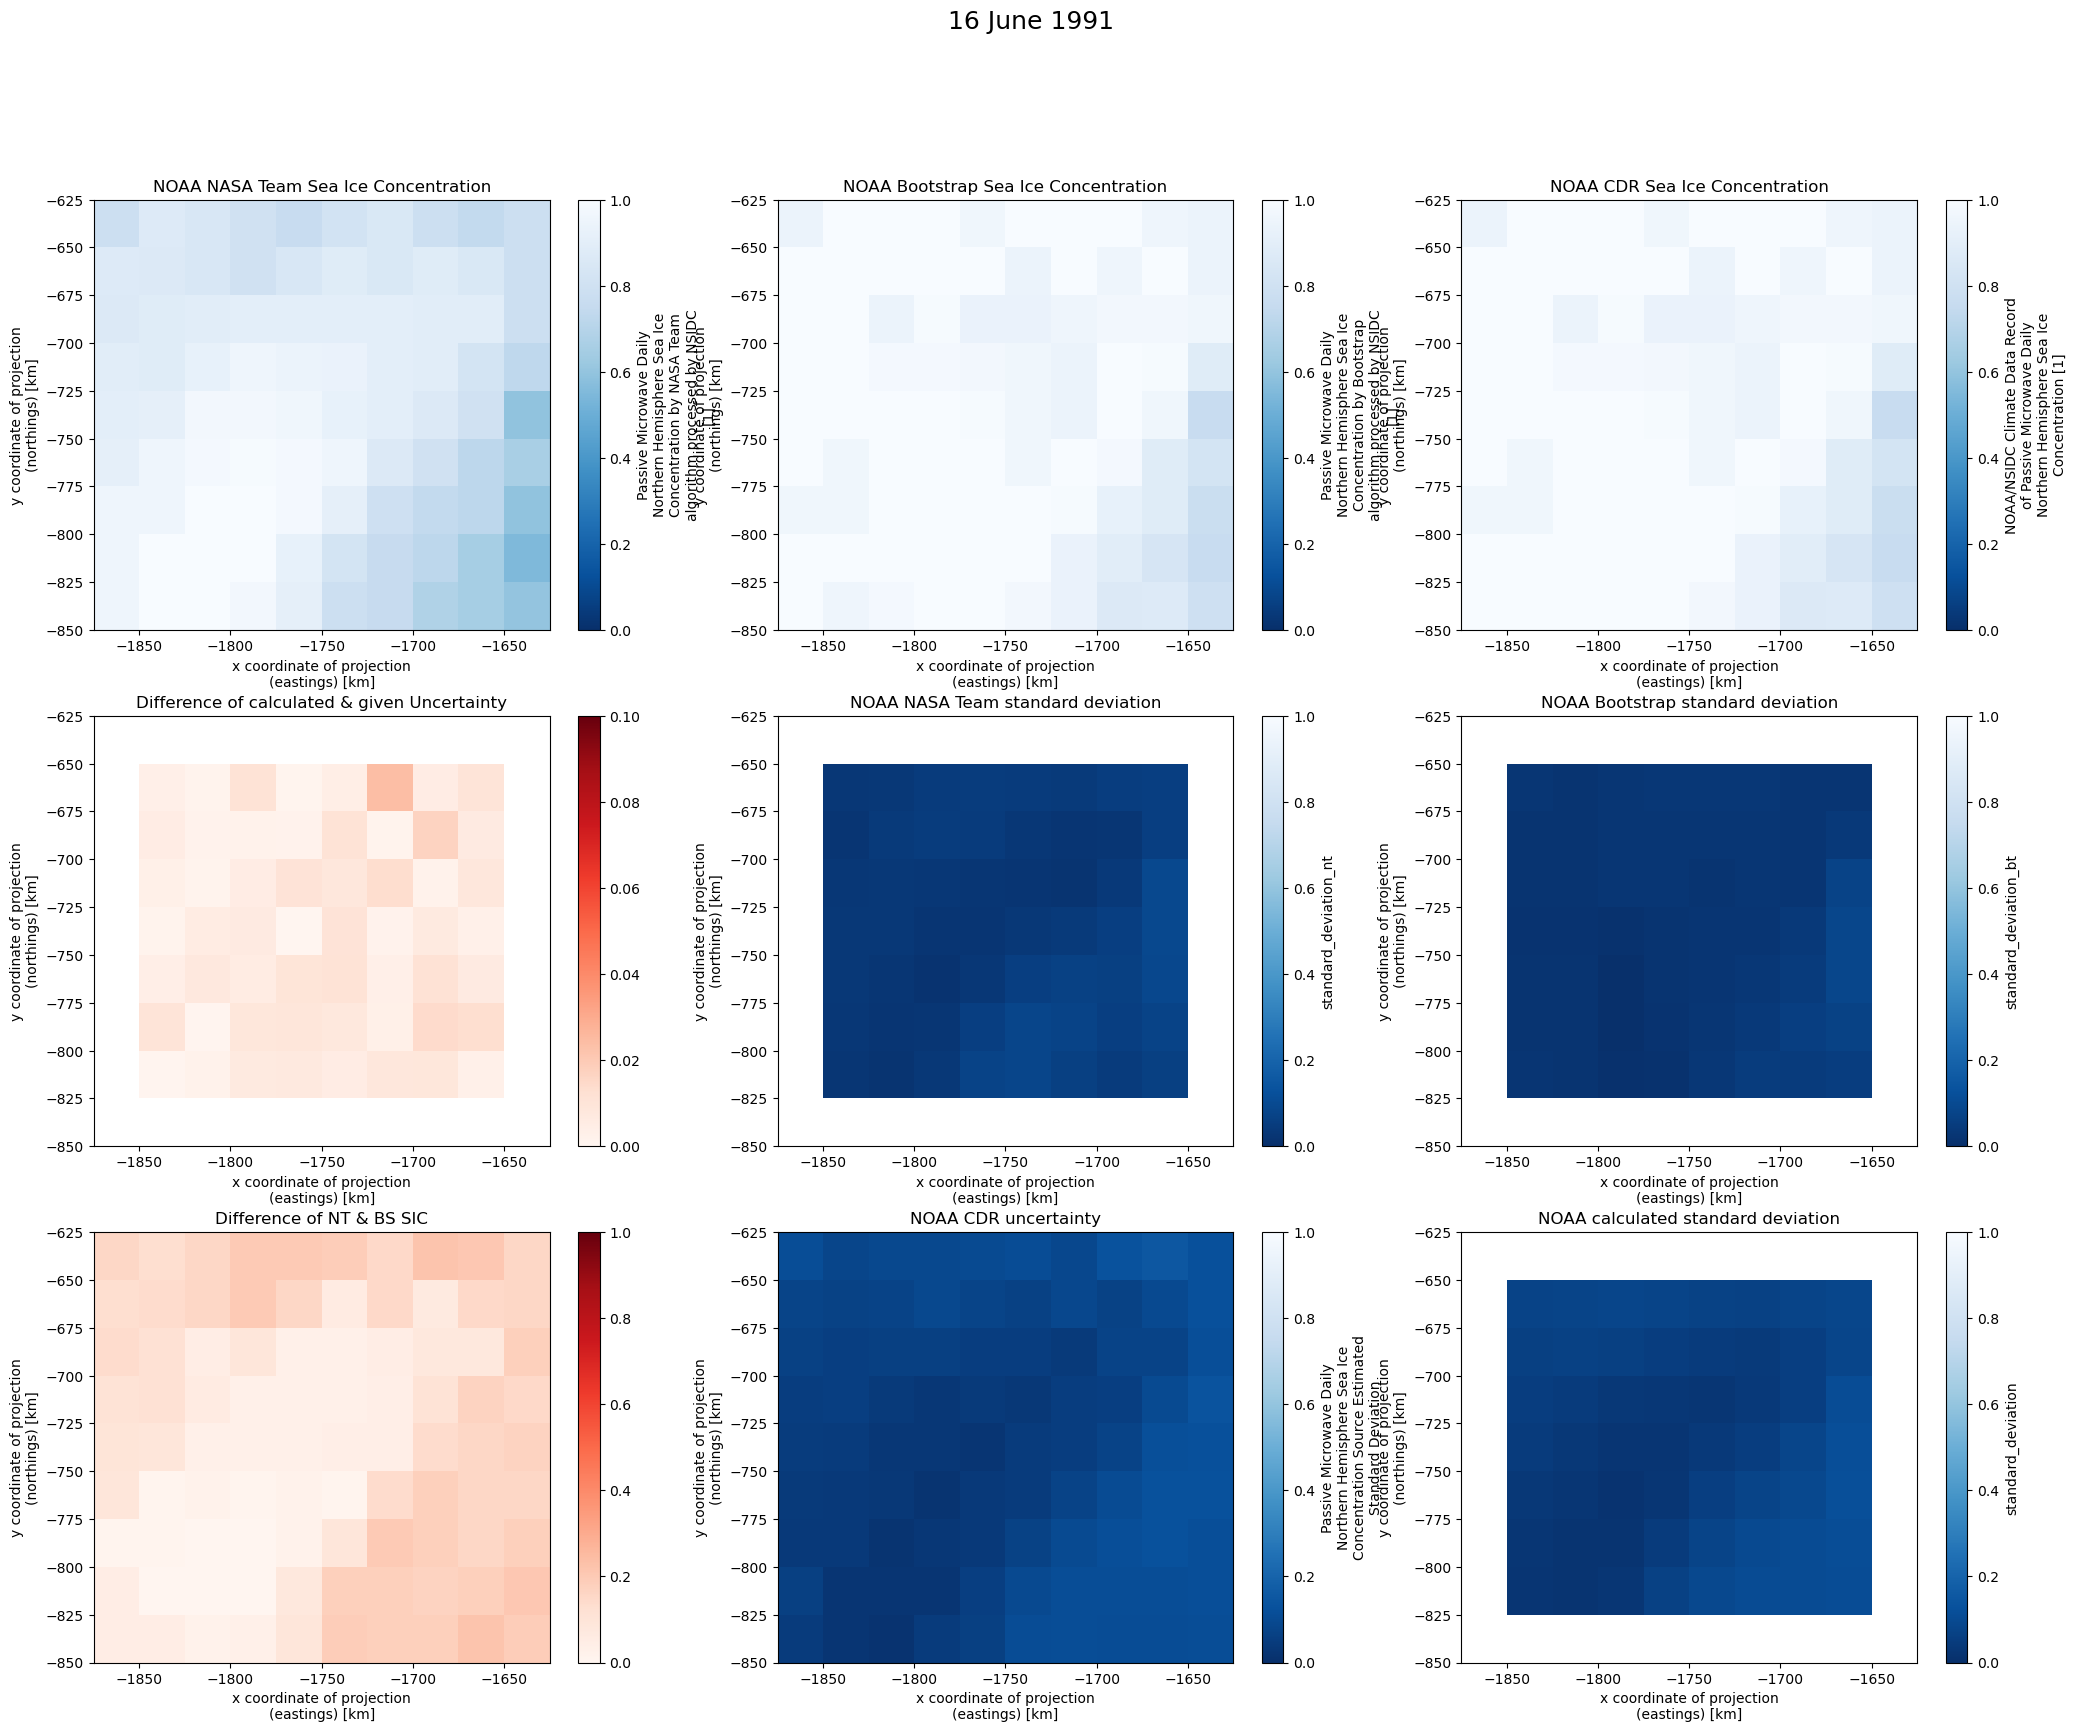

In [103]:
noaa1991_bt=noaa1991['nsidc_bt_seaice_conc'].isel(time=167)
noaa1991_nt=noaa1991['nsidc_nt_seaice_conc'].isel(time=167)
noaa1991_cdr=noaa1991['cdr_seaice_conc'].isel(time=167)
noaa1991_bt_sd=noaa1991['standard_deviation_bt'].isel(time=167)
noaa1991_nt_sd=noaa1991['standard_deviation_nt'].isel(time=167)
noaa1991_cdr_sd=noaa1991['stdev_of_cdr_seaice_conc'].isel(time=167)
noaa1991_clc_sd=noaa1991['standard_deviation'].isel(time=167)
diff_sd=abs(noaa1991_cdr_sd-noaa1991_clc_sd)
diff_sic=abs(noaa1991_nt-noaa1991_bt)
custom_cmap = 'Blues_r'
vmin=0
vmax=1

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25, 19))

noaa1991_nt.plot(cmap=custom_cmap, vmin=vmin, vmax=vmax, ax=axes[0, 0])
axes[0, 0].set_title('NOAA NASA Team Sea Ice Concentration')

noaa1991_bt.plot(cmap=custom_cmap, vmin=vmin, vmax=vmax, ax=axes[0, 1])
axes[0, 1].set_title('NOAA Bootstrap Sea Ice Concentration')

noaa1991_cdr.plot(cmap=custom_cmap, vmin=vmin, vmax=vmax, ax=axes[0, 2])
axes[0, 2].set_title('NOAA CDR Sea Ice Concentration')

noaa1991_nt_sd.plot(cmap=custom_cmap, vmin=vmin, vmax=vmax, ax=axes[1, 1])
axes[1, 1].set_title('NOAA NASA Team standard deviation')

noaa1991_bt_sd.plot(cmap=custom_cmap, vmin=vmin, vmax=vmax, ax=axes[1, 2])
axes[1, 2].set_title('NOAA Bootstrap standard deviation')

noaa1991_cdr_sd.plot(cmap=custom_cmap, vmin=vmin, vmax=vmax, ax=axes[2, 1])
axes[2, 1].set_title('NOAA CDR uncertainty')

noaa1991_clc_sd.plot(cmap=custom_cmap, vmin=vmin, vmax=vmax, ax=axes[2, 2])
axes[2, 2].set_title('NOAA calculated standard deviation')

diff_sd.plot(cmap='Reds', vmin=0, vmax=0.1, ax=axes[1, 0])
axes[1, 0].set_title('Difference of calculated & given Uncertainty')

diff_sic.plot(cmap='Reds', vmin=vmin, vmax=vmax, ax=axes[2, 0])
axes[2, 0].set_title('Difference of NT & BS SIC')

fig.suptitle('16 June 1991',fontsize=18)

#plt.savefig('31_07_1991_SICS.png')
plt.show()